<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
  <ul class="toc-item">
    <li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li>
    <li><span><a href="#Time-Series" data-toc-modified-id="Time-Series-2">Time Series</a></span></li>
      <ul class="toc-item">
        <li><span><a href="#Data-Preparation-(Time-Series)" data-toc-modified-id="Data-Preparation-(Time-Series)-2.1.1">Data Preparation (Time Series)</a></span></li>
      </ul>
      <li><span><a href="#ARIMA" data-toc-modified-id="ARIMA-3">ARIMA</a></span></li>
        <ul class="toc-item">
        <li><span><a href="#Inside-Sales" data-toc-modified-id="Inside-Sales-3.1">Inside Sales</a></span></li>
        <li><span><a href="#Food-Service" data-toc-modified-id="Food-Service-3.2">Food Service</a></span></li>
        <li><span><a href="#Diesel" data-toc-modified-id="Diesel-3.3">Diesel</a></span></li>
        <li><span><a href="#Unleaded-Gasoline" data-toc-modified-id="Unleaded-Gasoline-3.4">Unleaded Gasoline</a></span></li>
      </ul>
      <li><span><a href="#Exponential-Smoothing-Model" data-toc-modified-id="Exponential-Smoothing-Model-4">Exponential Smoothing Model</a></span></li>
        <ul class="toc-item">
          <li><span><a href="#Inside-Sales-ESM" data-toc-modified-id="Inside-Sales-ESM-4.1">Inside Sales</a></span></li>
          <li><span><a href="#Food-Service-ESM" data-toc-modified-id="Food-Service-ESM-4.2">Food Service</a></span></li>
          <li><span><a href="#Diesel-ESM" data-toc-modified-id="Diesel-ESM-4.3">Diesel</a></span></li>
          <li><span><a href="#Unleaded-Gasoline-ESM" data-toc-modified-id="Unleaded-Gasoline-ESM-4.4">Unleaded Gasoline</a></span></li>
        </ul>
      <li><span><a href="#Prophet-Model" data-toc-modified-id="Prophet-Model-5">Prophet Model</a></span></li>
        <ul class="toc-item">
        <li><span><a href="#Inside-Sales-PM" data-toc-modified-id="Inside-Sales-PM-5.1">Inside Sales</a></span></li>
        <li><span><a href="#Food-Service-PM" data-toc-modified-id="Food-Service-PM-5.2">Food Service</a></span></li>
        <li><span><a href="#Diesel-PM" data-toc-modified-id="Diesel-PM-5.3">Diesel</a></span></li>
        <li><span><a href="#Unleaded-Gasoline-PM" data-toc-modified-id="Unleaded-Gasoline-PM-5.4">Unleaded Gasoline</a></span></li>
      </ul>
    <li><span><a href="#Tree-Models" data-toc-modified-id="Tree-Models-6">Tree Models</a></span></li>
      <ul class="toc-item">
        <li><span><a href="#Data-Preparation-(Tree-Models)" data-toc-modified-id="Data-Preparation-(Tree-Models)-6.1">Data Preparation (Tree Models)</a></span></li>
        <li><span><a href="#Dummy-Variables" data-toc-modified-id="Dummy-Variables-6.2">Dummy Variables</a></span></li>
      </ul>
    <li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-7">Random Forest</a></span>
      <ul class="toc-item">
        <li><span><a href="#Inside-Sales-RF" data-toc-modified-id="Inside-Sales-RF-7.1">Inside Sales</a></span></li>
        <li><span><a href="#Examining-Feature-Importance" data-toc-modified-id="Examining-Feature-Importance-7.2">Examining Feature Importance</a></span></li>
        <li><span><a href="#Food-Service-RF" data-toc-modified-id="Food-Service-RF-7.3">Food Service</a></span></li>
        <li><span><a href="#Diesel-RF" data-toc-modified-id="Diesel-RF-7.4">Diesel</a></span></li>
        <li><span><a href="#Unleaded-Gasoline-RF" data-toc-modified-id="Unleaded-Gasoline-RF-7.5">Unleaded Gasoline</a></span></li>
      </ul>
    </li>
    <li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-8">XGBoost</a></span></li>
    <li><span><a href="#Examining-Models-on-Test-Data" data-toc-modified-id="Examining-Models-on-Test-Data-9">Examining Models on Test Data</a></span></li>
    <li><span><a href="#Results" data-toc-modified-id="Results-10">Results</a></span></li>
    <li><span><a href="#Appendix-1" data-toc-modified-id="Appendix-1-11">Appendix 1</a></span></li>
    <li><span><a href="#Group-Member-Contributions" data-toc-modified-id="Group-Member-Contributions-12">Group Member Contributions</a></span></li>
  </ul>
</div>

## INTRODUCTION

#### Project Goal:
The project's primary goal is to create a forecasting solution for accurately predicting sales at new Maverik stores during their first year of operation, focusing on Inside Sales, Food Service, Diesel, and Unleaded Gasoline segments. Additionally, it aims to improve daily sales forecasts by incorporating past performance data.
#### Business Problems:
Accurate Sales Forecasting for New Stores: Maverik needs precise sales predictions for new store planning and evaluation.
Daily Sales Forecast: The project aims to provide daily sales forecasts for operational planning.
Adjustment for Past Performance: The model needs to adjust daily forecasts based on historical data.
#### Analytical Problems:
Develop Annual Sales Forecast Models: Create models for accurate annual sales forecasts considering store-specific factors.
Develop Daily Sales Forecast Models: Create models for daily forecasts, considering seasonality and store-specific attributes.
Incorporate Past Performance Data: Address the model's naivety by incorporating historical data to improve forecast accuracy.
#### Purpose of the Notebook:
The notebook serves as a collaborative tool for data analysis, model development, and solution implementation. It contains code, data exploration, machine learning models, and visualizations to achieve the project's goals, facilitating informed decision-making for new store openings and operational efficiency.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from datetime import date, timedelta
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

## Time Series

### Data Preparation (Time Series)

In [2]:
# Load your dataset
df = pd.read_csv("../Maverik_Capstone/data/merged_data.csv")  # Replace with your data file path

In [3]:
# Convert date columns to datetime objects
df['capital_projects.soft_opening_date'] = pd.to_datetime(df['capital_projects.soft_opening_date'])
df['calendar.calendar_day_date'] = pd.to_datetime(df['calendar.calendar_day_date'])

# Ensure the data is sorted by date
df = df.sort_values(by='capital_projects.soft_opening_date')

# Create lag features for each sales metric to capture seasonality
lags = [1, 7, 30, 365]  # Example lag periods (1 day, 1 week, 1 month, 1 year)
for metric in ['inside_sales', 'food_service', 'diesel_x', 'unleaded']:
    for lag in lags:
        df[f'{metric}_lag_{lag}'] = df[metric].shift(lag)
        
        
# Create additional time-related features
df['day_of_week'] = df['capital_projects.soft_opening_date'].dt.dayofweek
df['day_of_month'] = df['capital_projects.soft_opening_date'].dt.day
df['month'] = df['capital_projects.soft_opening_date'].dt.month
df['year'] = df['capital_projects.soft_opening_date'].dt.year

# Print the updated DataFrame
# print(df)

## ARIMA Model

### Inside Sales

In [4]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
metric_to_forecast = 'inside_sales'

# Split your data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
validation_data = df[train_size:]

# Define the order of the SARIMA model (p, d, q, P, D, Q, s)
p = 1  # AutoRegressive (AR) order
d = 1  # Integrated (I) order (to make the time series stationary)
q = 1  # Moving Average (MA) order
P = 1  # Seasonal AR order
D = 1  # Seasonal I order
Q = 1  # Seasonal MA order
s = 7  # Seasonal period (e.g., 7 for daily data with weekly seasonality)

# Create and fit the SARIMA model
model = SARIMAX(train_data[metric_to_forecast], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=0)

print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      inside_sales   No. Observations:                10833
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -86596.918
Date:                           Tue, 14 Nov 2023   AIC                         173203.836
Time:                                   19:07:14   BIC                         173240.285
Sample:                                        0   HQIC                        173216.125
                                         - 10833                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0791      0.008      9.951      0.000       0.064       0.095
ma.L1         -0.8239      0.005   -154.175

In [5]:
# Make forecasts on the validation set
forecast_values = model_fit.forecast(steps=len(validation_data))

actual_values = df['inside_sales'][-len(forecast_values):]

squared_errors = (actual_values - forecast_values) ** 2


# Calculate MAE to assess model performance
mae = mean_absolute_error(validation_data[metric_to_forecast], forecast_values)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecast_values)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 720.1954003030088
Mean Squared Error: 815036.573554479
Root Mean Squared Error: 902.7937602545107


### Food Service

In [6]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
metric_to_forecast = 'food_service'

# Split your data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
validation_data = df[train_size:]

# Define the order of the SARIMA model (p, d, q, P, D, Q, s)
p = 1  # AutoRegressive (AR) order
d = 1  # Integrated (I) order (to make the time series stationary)
q = 1  # Moving Average (MA) order
P = 1  # Seasonal AR order
D = 1  # Seasonal I order
Q = 1  # Seasonal MA order
s = 7  # Seasonal period (e.g., 7 for daily data with weekly seasonality)

# Create and fit the SARIMA model
model = SARIMAX(train_data[metric_to_forecast], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=0)

print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      food_service   No. Observations:                10833
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -74803.841
Date:                           Tue, 14 Nov 2023   AIC                         149617.682
Time:                                   19:07:21   BIC                         149654.131
Sample:                                        0   HQIC                        149629.971
                                         - 10833                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0573      0.006      9.121      0.000       0.045       0.070
ma.L1         -0.8752      0.004   -241.511

In [7]:
# Make forecasts on the validation set
forecast_values = model_fit.forecast(steps=len(validation_data))

actual_values = df['food_service'][-len(forecast_values):]

squared_errors = (actual_values - forecast_values) ** 2


# Calculate MAE to assess model performance
mae = mean_absolute_error(validation_data[metric_to_forecast], forecast_values)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecast_values)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 270.32279061303296
Mean Squared Error: 108323.8979284771
Root Mean Squared Error: 329.12596058116884


### Diesel

In [8]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
metric_to_forecast = 'diesel_x'

# Split your data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
validation_data = df[train_size:]

# Define the order of the SARIMA model (p, d, q, P, D, Q, s)
p = 1  # AutoRegressive (AR) order
d = 1  # Integrated (I) order (to make the time series stationary)
q = 1  # Moving Average (MA) order
P = 1  # Seasonal AR order
D = 1  # Seasonal I order
Q = 1  # Seasonal MA order
s = 7  # Seasonal period (e.g., 7 for daily data with weekly seasonality)

# Create and fit the SARIMA model
model = SARIMAX(train_data[metric_to_forecast], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=0)

print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                          diesel_x   No. Observations:                10833
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -90711.087
Date:                           Tue, 14 Nov 2023   AIC                         181432.174
Time:                                   19:07:31   BIC                         181468.622
Sample:                                        0   HQIC                        181444.463
                                         - 10833                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0074      0.004      1.783      0.075      -0.001       0.016
ma.L1         -0.7165      0.003   -251.684

In [9]:
# Make forecasts on the validation set
forecast_values = model_fit.forecast(steps=len(validation_data))

actual_values = df['diesel_x'][-len(forecast_values):]

squared_errors = (actual_values - forecast_values) ** 2


# Calculate MAE to assess model performance
mae = mean_absolute_error(validation_data[metric_to_forecast], forecast_values)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecast_values)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 1320.7669502219612
Mean Squared Error: 3676509.025919699
Root Mean Squared Error: 1917.4224954140125


### Unleaded Gasoline

In [10]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
metric_to_forecast = 'unleaded'

# Split your data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
validation_data = df[train_size:]

# Define the order of the SARIMA model (p, d, q, P, D, Q, s)
p = 1  # AutoRegressive (AR) order
d = 1  # Integrated (I) order (to make the time series stationary)
q = 1  # Moving Average (MA) order
P = 1  # Seasonal AR order
D = 1  # Seasonal I order
Q = 1  # Seasonal MA order
s = 7  # Seasonal period (e.g., 7 for daily data with weekly seasonality)

# Create and fit the SARIMA model
model = SARIMAX(train_data[metric_to_forecast], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=0)

print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                          unleaded   No. Observations:                10833
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -83848.382
Date:                           Tue, 14 Nov 2023   AIC                         167706.763
Time:                                   19:07:39   BIC                         167743.211
Sample:                                        0   HQIC                        167719.052
                                         - 10833                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1128      0.010     11.436      0.000       0.093       0.132
ma.L1         -0.7683      0.007   -116.410

In [11]:
# Make forecasts on the validation set
forecast_values = model_fit.forecast(steps=len(validation_data))

actual_values = df['unleaded'][-len(forecast_values):]

squared_errors = (actual_values - forecast_values) ** 2


# Calculate MAE to assess model performance
mae = mean_absolute_error(validation_data[metric_to_forecast], forecast_values)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecast_values)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 990.3563381078786
Mean Squared Error: 1603957.830898853
Root Mean Squared Error: 1266.4745678057861


The accuracy of the ARIMA model was marginal and it was determined to examine other models for improved performance.

## Exponential Smoothing Model

### Inside Sales ESM

In [12]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
target_metric = 'inside_sales'

# Split the data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
val_data = df[train_size:]

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(train_data[target_metric], seasonal='add', seasonal_periods=365)  # You can adjust seasonal_periods
model_fit = model.fit()

# print(model_fit.summary())

In [13]:
# Make forecasts on the validation set
forecast = model_fit.forecast(steps=len(val_data))

# Calculate squared errors
squared_errors = (val_data[target_metric] - forecast) ** 2

# Calculate MAE to assess model performance
mae = mean_absolute_error(val_data[target_metric], forecast)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(val_data[target_metric], forecast)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 638.2435984866067
Mean Squared Error: 637995.4942073831
Root Mean Squared Error: 798.7462013727409


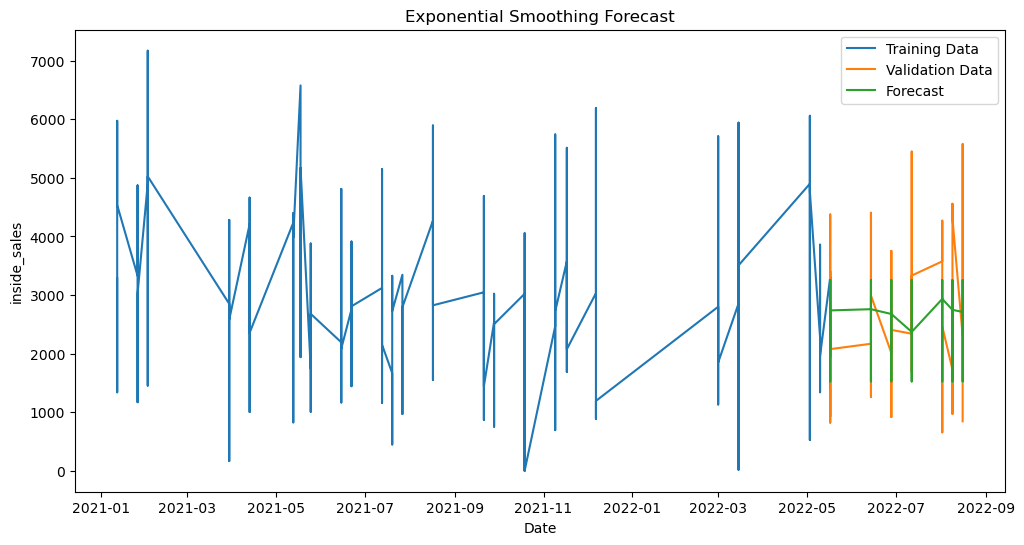

In [14]:
# Plot the actual and forecasted data for visualization
plt.figure(figsize=(12, 6))
plt.plot(train_data['capital_projects.soft_opening_date'], train_data[target_metric], label='Training Data')
plt.plot(val_data['capital_projects.soft_opening_date'], val_data[target_metric], label='Validation Data')
plt.plot(val_data['capital_projects.soft_opening_date'], forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel(target_metric)
plt.title('Exponential Smoothing Forecast')
plt.show()

### Food Service ESM

In [15]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
target_metric = 'food_service'

# Split the data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
val_data = df[train_size:]

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(train_data[target_metric], seasonal='add', seasonal_periods=365)  # You can adjust seasonal_periods
model_fit = model.fit()

# print(model_fit.summary())

In [16]:
# Make forecasts on the validation set
forecast = model_fit.forecast(steps=len(val_data))

# Calculate squared errors
squared_errors = (val_data[target_metric] - forecast) ** 2

# Calculate MAE to assess model performance
mae = mean_absolute_error(val_data[target_metric], forecast)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(val_data[target_metric], forecast)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 241.10156627701028
Mean Squared Error: 90829.89621713806
Root Mean Squared Error: 301.37998642434445


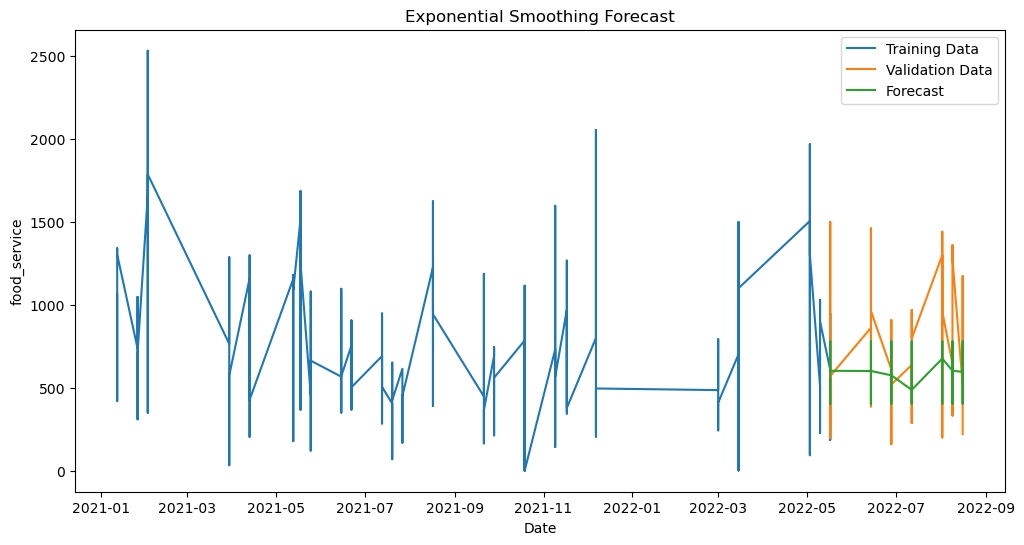

In [17]:
# Plot the actual and forecasted data for visualization
plt.figure(figsize=(12, 6))
plt.plot(train_data['capital_projects.soft_opening_date'], train_data[target_metric], label='Training Data')
plt.plot(val_data['capital_projects.soft_opening_date'], val_data[target_metric], label='Validation Data')
plt.plot(val_data['capital_projects.soft_opening_date'], forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel(target_metric)
plt.title('Exponential Smoothing Forecast')
plt.show()

### Diesel ESM

In [18]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
target_metric = 'diesel_x'

# Split the data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
val_data = df[train_size:]

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(train_data[target_metric], seasonal='add', seasonal_periods=365)  # You can adjust seasonal_periods
model_fit = model.fit()

# print(model_fit.summary())

In [19]:
# Make forecasts on the validation set
forecast = model_fit.forecast(steps=len(val_data))

# Calculate squared errors
squared_errors = (val_data[target_metric] - forecast) ** 2

# Calculate MAE to assess model performance
mae = mean_absolute_error(val_data[target_metric], forecast)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(val_data[target_metric], forecast)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 1179.4642168231715
Mean Squared Error: 2960526.8049080274
Root Mean Squared Error: 1720.6181461637639


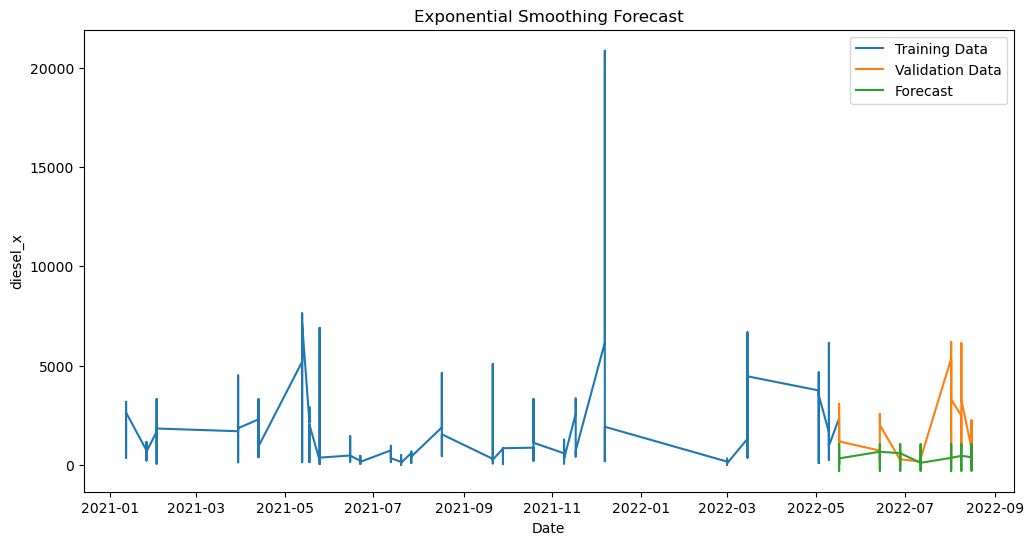

In [20]:
# Plot the actual and forecasted data for visualization
plt.figure(figsize=(12, 6))
plt.plot(train_data['capital_projects.soft_opening_date'], train_data[target_metric], label='Training Data')
plt.plot(val_data['capital_projects.soft_opening_date'], val_data[target_metric], label='Validation Data')
plt.plot(val_data['capital_projects.soft_opening_date'], forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel(target_metric)
plt.title('Exponential Smoothing Forecast')
plt.show()

### Unleaded Gasoline ESM

In [21]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
target_metric = 'unleaded'

# Split the data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
val_data = df[train_size:]

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(train_data[target_metric], seasonal='add', seasonal_periods=365)  # You can adjust seasonal_periods
model_fit = model.fit()

# print(model_fit.summary())

In [22]:
# Make forecasts on the validation set
forecast = model_fit.forecast(steps=len(val_data))

# Calculate squared errors
squared_errors = (val_data[target_metric] - forecast) ** 2

# Calculate MAE to assess model performance
mae = mean_absolute_error(val_data[target_metric], forecast)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(val_data[target_metric], forecast)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 845.4806040826656
Mean Squared Error: 1129166.8619062463
Root Mean Squared Error: 1062.6226338198553


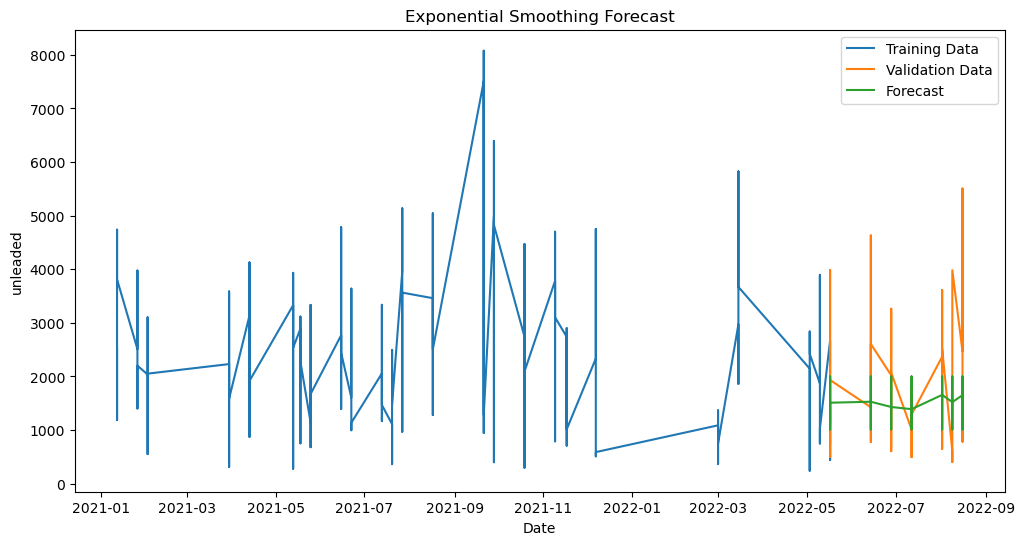

In [23]:
# Plot the actual and forecasted data for visualization
plt.figure(figsize=(12, 6))
plt.plot(train_data['capital_projects.soft_opening_date'], train_data[target_metric], label='Training Data')
plt.plot(val_data['capital_projects.soft_opening_date'], val_data[target_metric], label='Validation Data')
plt.plot(val_data['capital_projects.soft_opening_date'], forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel(target_metric)
plt.title('Exponential Smoothing Forecast')
plt.show()

Exponential Smoothing showed improved accuracy over ARIMA.

## Prophet Model

### Inside Sales PM

19:07:44 - cmdstanpy - INFO - Chain [1] start processing
19:07:46 - cmdstanpy - INFO - Chain [1] done processing


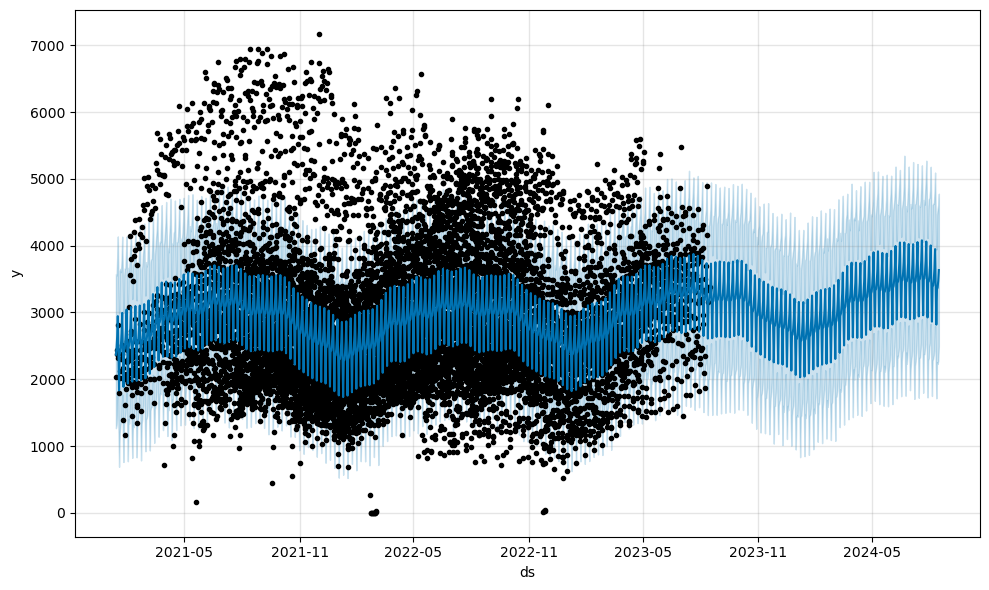

In [24]:
# Create a DataFrame with 'ds' and 'y' columns for Prophet
prophet_df = df[['calendar.calendar_day_date', 'inside_sales']]
prophet_df.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(prophet_df)

# Generate future dates for forecasting
future = model.make_future_dataframe(periods=365)  # Adjust 'periods' as needed

# Get forecast for future dates
forecast = model.predict(future)

fig = model.plot(forecast)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Actual values for the validation set
actual_values = df['inside_sales'][-len(forecast):]

# Predicted values from the Prophet forecast
predicted_values = forecast['yhat'][-len(forecast):]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 793.5467147544775
Mean Squared Error (MSE): 945173.1463883679
Root Mean Squared Error (RMSE): 972.2001575747496


### Food Service PM

19:07:49 - cmdstanpy - INFO - Chain [1] start processing
19:07:53 - cmdstanpy - INFO - Chain [1] done processing


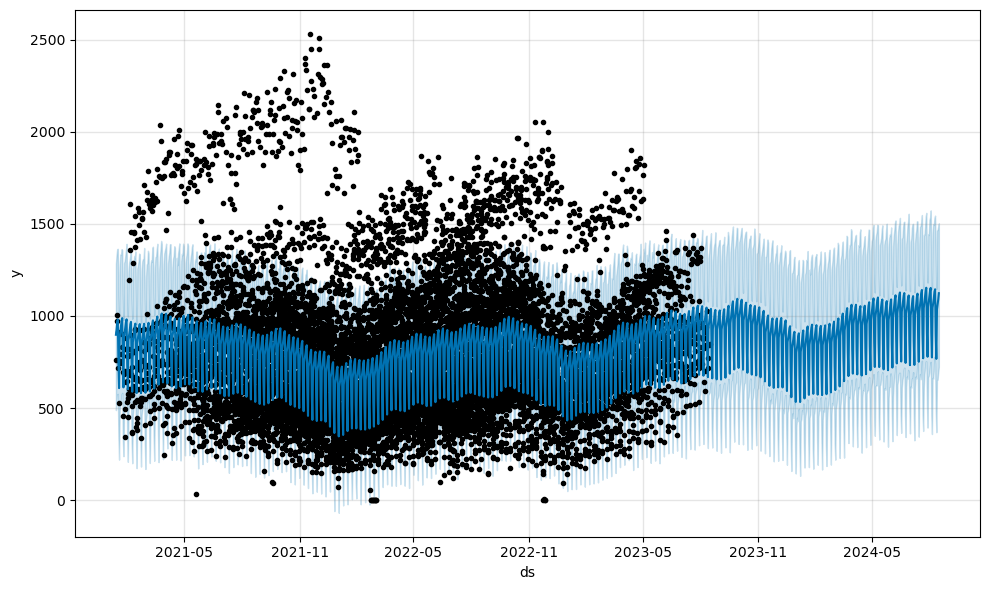

In [26]:
# Create a DataFrame with 'ds' and 'y' columns for Prophet
prophet_df = df[['calendar.calendar_day_date', 'food_service']]
prophet_df.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(prophet_df)

# Generate future dates for forecasting
future = model.make_future_dataframe(periods=365)  # Adjust 'periods' as needed

# Get forecast for future dates
forecast = model.predict(future)

fig = model.plot(forecast)

In [27]:
# Actual values for the validation set
actual_values = df['food_service'][-len(forecast):]

# Predicted values from the Prophet forecast
predicted_values = forecast['yhat'][-len(forecast):]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 226.92733924575143
Mean Squared Error (MSE): 78706.9813380265
Root Mean Squared Error (RMSE): 280.54764539740216


### Diesel PM

19:07:55 - cmdstanpy - INFO - Chain [1] start processing
19:08:00 - cmdstanpy - INFO - Chain [1] done processing


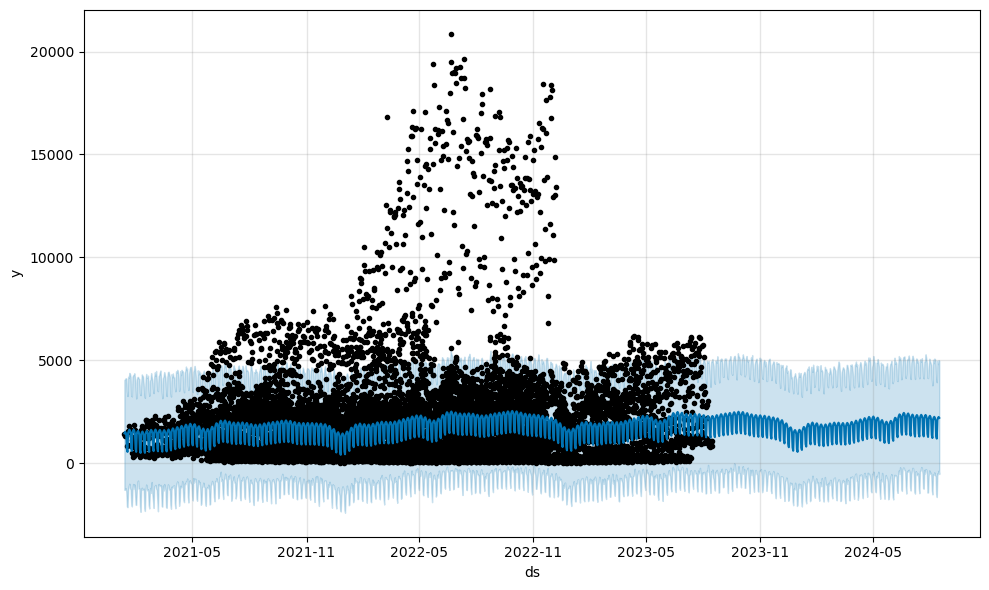

In [28]:
# Create a DataFrame with 'ds' and 'y' columns for Prophet
prophet_df = df[['calendar.calendar_day_date', 'diesel_x']]
prophet_df.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(prophet_df)

# Generate future dates for forecasting
future = model.make_future_dataframe(periods=365)  # Adjust 'periods' as needed

# Get forecast for future dates
forecast = model.predict(future)

fig = model.plot(forecast)

In [29]:
# Actual values for the validation set
actual_values = df['diesel_x'][-len(forecast):]

# Predicted values from the Prophet forecast
predicted_values = forecast['yhat'][-len(forecast):]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1323.1376235696562
Mean Squared Error (MSE): 2697579.737208189
Root Mean Squared Error (RMSE): 1642.4310448868741


### Unleaded Gasoline PM

19:08:02 - cmdstanpy - INFO - Chain [1] start processing
19:08:07 - cmdstanpy - INFO - Chain [1] done processing


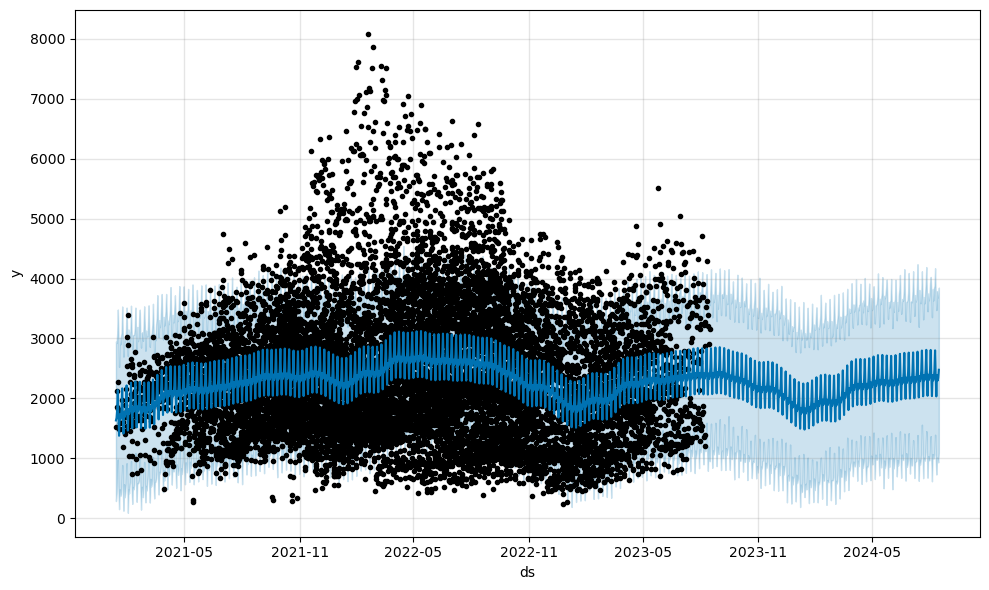

In [30]:
# Create a DataFrame with 'ds' and 'y' columns for Prophet
prophet_df = df[['calendar.calendar_day_date', 'unleaded']]
prophet_df.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(prophet_df)

# Generate future dates for forecasting
future = model.make_future_dataframe(periods=365)  # Adjust 'periods' as needed

# Get forecast for future dates
forecast = model.predict(future)

fig = model.plot(forecast)

In [31]:
# Actual values for the validation set
actual_values = df['unleaded'][-len(forecast):]

# Predicted values from the Prophet forecast
predicted_values = forecast['yhat'][-len(forecast):]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 944.8082140921507
Mean Squared Error (MSE): 1204673.6122256734
Root Mean Squared Error (RMSE): 1097.5762443792564


The Prophet model was able to capture seasonality, however the mean accuracy of the model was less than that of Exponential Smoothing.

## Tree Models

An important part of the project is to be able to accurately model store sales prior to store opening.  ARIMA poses a couple of significant challenges in this regard.  Time-series modelling can do a good job of modelling seasonality, but multi-variate ARIMA while possible is challenging to implement and outside the scope of this project.  Therefore, other factors that influence store sales are not taken into account.  

In addition, ARIMA becomes increasingly unstable as the prediction gets further from actual data.  Not to mention, there is no available data to give to the ARIMA model in order to predict accurate sales up to a year in the future.  

For this reason, we determined to utilize some tree-based regression algorithms in order to model the data for new stores, hopefully providing us with either a model to predict sales, or at minimum, a means of generating relatively accurate data to give to an ARIMA model in lieu of actual sales data, prior to store opening.

### Data Preparation (Tree Models)

Random Forest Models require numeric data.  Therefore the dataset was modified to accomodate the requirements of the algorithm.

In [32]:
# Load your dataset
df = pd.read_csv("../Maverik_Capstone/data/merged_data.csv")  # Replace with your data file path
print(df.shape)
cat = pd.read_csv("../Maverik_Capstone/data/qualitative_data_msba_clean.csv")
print(cat.shape)
print(cat['hi_flow_lanes_fueling_positions_2'] > 8) # Identify outlier store

np.random.seed(1234)
test_idx = list(np.random.randint(0,len(cat),5))
out_store = cat.loc[1]['site_id_msba']
test = cat.loc[test_idx]['site_id_msba']
print(test.values) # stores to remove for testing
# print(out_store)

#Parse Date
df['cal.day'] = pd.DatetimeIndex(df['calendar.calendar_day_date']).day
df['cal.month'] = pd.DatetimeIndex(df['calendar.calendar_day_date']).month
df['cal.year'] = pd.DatetimeIndex(df['calendar.calendar_day_date']).year

# Data for Modelling
df = df[['site_id_msba', # ID Variable
         'calendar.calendar_day_date', # Date Variable
           # Target Variables
           'inside_sales',
           'food_service',
           'diesel_x', 
           'unleaded',
           # Predictor Variables
           'calendar.fiscal_week_id_for_year',
           'calendar.day_of_week',
           'x1_mile_pop', 
           'x1_mile_emp',
           'x1_mile_income', 
           'x1_2_mile_pop', 
           'x1_2_mile_emp', 
           'x1_2_mile_income',
           'x5_min_pop', 
           'x5_min_emp', 
           'x5_min_inc', 
           'x7_min_pop', 
           'x7_min_emp',
           'x7_min_inc', 
           'traditional_forecourt_fueling_positions',
           'calendar_information.holiday',
           'cal.month',
           # Other Predictor Variables
#            'square_feet',
           'front_door_count', 
           'parking_spaces',
           'lottery', 
#            'freal', 
           'bonfire_grill', 
           'pizza', 
           'cinnabon',
#            'godfather_s_pizza', 
           'ethanol_free', 
           'diesel_y', 
           'hi_flow_lanes',
#            'rv_lanes', 
           'hi_flow_rv_lanes', 
#            'def', 
#            'cat_scales', 
           'car_wash',
#            'ev_charging', 
#            'rv_dumps', 
#            'propane',
           'traditional_forecourt_layout', 
           'traditional_forecourt_stack_type',
           'rv_lanes_fueling_positions', 
#            'rv_lanes_layout', 
#            'rv_lanes_stack_type',
           'hi_flow_lanes_fueling_positions', 
#            'hi_flow_lanes_layout',
#            'hi_flow_lanes_stack_type', 
           'hi_flow_lanes_fueling_positions_2',
           'rv_lanes_fueling_positions_2', 
#            'hi_flow_rv_lanes_layout',
#            'hi_flow_rv_lanes_stack_type', 
           'non_24_hour', 
#            'self_check_out',
#            'mens_toilet_count', 
#            'mens_urinal_count', 
#            'womens_toilet_count',
#            'womens_sink_count'
          ]]

(13542, 65)
(37, 55)
0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
Name: hi_flow_lanes_fueling_positions_2, dtype: bool
[22925 22680 23415 22785 23380]


### Dummy Variables

In [33]:
## Get Dummy Variables

# Get Holiday Dummies
df = pd.get_dummies(df, prefix = 'holiday', columns=['calendar_information.holiday'], drop_first=False).drop(columns=['holiday_NONE'])

# Get Day of Week Dummies
df = pd.get_dummies(df, prefix = 'day', columns=['calendar.day_of_week'], drop_first=False).drop(columns=['day_Monday'])

# Convert Yes/No to 1/0
col_list=['lottery',
#           'freal',
          'bonfire_grill',
          'pizza',
          'cinnabon',
#           'godfather_s_pizza',
          'ethanol_free',
          'diesel_y',
          'hi_flow_lanes',
#           'rv_lanes',
          'hi_flow_rv_lanes',
#           'def',
#           'cat_scales',
          'car_wash',
#           'ev_charging',
#           'rv_dumps',
#           'propane',
          'non_24_hour',
#           'self_check_out'
          ]

for col in col_list:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Get Dummies for Layout variables
col_list=['traditional_forecourt_layout',
          'traditional_forecourt_stack_type',
#           'rv_lanes_layout',
#           'rv_lanes_stack_type',
#           'hi_flow_lanes_layout',
#           'hi_flow_lanes_stack_type',
#           'hi_flow_rv_lanes_layout',
#           'hi_flow_rv_lanes_stack_type',
         ]

for col in col_list:
    df = pd.get_dummies(df, prefix = col, columns=[col], drop_first=True)
    
# Reshape Data for model building
data = df.drop(df[df['site_id_msba'].isin(test.values)].index) # Drop Test Stores from df
data = data.drop(data[data['site_id_msba'].isin([out_store])].index) # Drop Outlier Store from data
# Reserve unused test data
test_df = df.loc[df['site_id_msba'].isin(test.values)]
print(data.shape)
print(test_df.shape)

(11346, 71)
(1830, 71)


## Random Forest

Random Forest models are an ensemble model that seeks to improve performance by using multiple smaller models to accurately model segments of the data, and then in aggregate provide a more accurate model than might be possible with a single tree model.  

In [34]:
target_cols = ['site_id_msba', 'calendar.calendar_day_date', 'inside_sales', 'food_service','diesel_x', 'unleaded']
X = data.drop(columns=target_cols)
y = pd.DataFrame(data[target_cols])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1234)

Each of the sales segments were modelled individually as different features will influence each of the sales segments differently.  Therefore a seperate model is needed to predict each sales segment's expected value.

### Inside Sales RF

In [35]:
is_regressor=RandomForestRegressor(n_estimators=100, random_state=1234)
is_regressor.fit(X_train, y_train['inside_sales'])
print(is_regressor.score(X_train, y_train['inside_sales']))
preds = is_regressor.predict(X_val)
print(is_regressor.score(X_val, y_val['inside_sales']))
MSE = mean_squared_error(y_val['inside_sales'], preds)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_val['inside_sales'], preds)
is_error = abs(preds - y_val['inside_sales'])

print(MSE)
print(RMSE)
print(MAE)
print()
print(df['inside_sales'].describe())
print()
print(is_error.describe(np.linspace(0.1,1,num=10)))

0.9772649345390025
0.8771793640651432
111395.35766765836
333.7594308295398
210.47623881177302

count    13542.000000
mean      2853.020648
std        988.392541
min          0.000000
25%       2182.879125
50%       2694.347250
75%       3337.182625
max       7172.466000
Name: inside_sales, dtype: float64

count    2837.000000
mean      210.476239
std       259.072903
min         0.063070
10%        25.512361
20%        54.477010
30%        81.809560
40%       115.750852
50%       147.331205
60%       187.527452
70%       233.598386
80%       300.173545
90%       426.999363
100%     3950.838080
max      3950.838080
Name: inside_sales, dtype: float64


### Examining Feature Importance

In [36]:
is_regressor.feature_importances_
is_feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, is_regressor.feature_importances_):
    is_feats[feature] = importance #add the name/value pair 
sorted_feats_is = sorted(is_feats.items(), key=lambda x:x[1], reverse=True)
sorted_feats_is = pd.DataFrame(sorted_feats_is, columns=['Feature', 'Importance'])

sorted_feats_is

,Feature,Importance
0,calendar.fiscal_week_id_for_year,0.176928
1,x7_min_pop,0.175471
2,day_Sunday,0.100313
3,x5_min_pop,0.067406
4,day_Saturday,0.058031
...,...,...
60,holiday_All Saint's Day,0.000050
61,front_door_count,0.000000
62,diesel_y,0.000000
63,car_wash,0.000000


<Axes: xlabel='Importance', ylabel='Feature'>

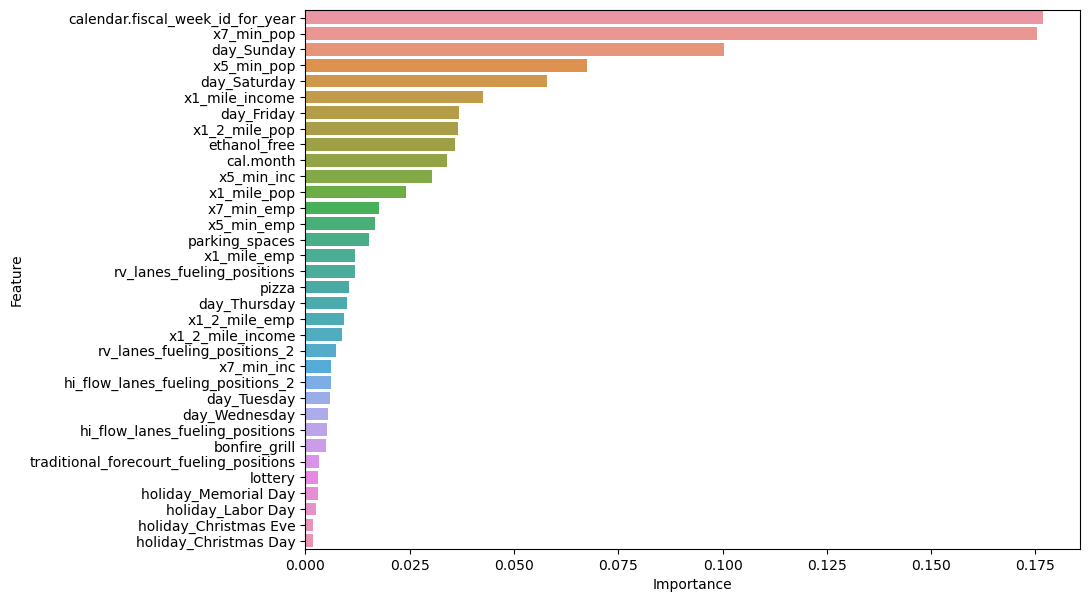

In [37]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=sorted_feats_is[:34], x='Importance', y='Feature')

### Food Service RF

In [38]:
fs_regressor=RandomForestRegressor(n_estimators=100, random_state=1234)
fs_regressor.fit(X_train, y_train['food_service'])
print(fs_regressor.score(X_train, y_train['food_service']))
preds = fs_regressor.predict(X_val)
print(fs_regressor.score(X_val, y_val['food_service']))
MSE = mean_squared_error(y_val['food_service'], preds)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_val['food_service'], preds)
fs_error = abs(preds - y_val['food_service'])

print(MSE)
print(RMSE)
print(MAE)
print()
print(df['food_service'].describe(np.linspace(0.1,1,num=10)))

0.9825608706247329
0.8931770588973759
10208.320376579431
101.03623298886113
65.4491520274057

count    13542.000000
mean       766.683640
std        342.896604
min          0.000000
10%        406.446250
20%        490.693700
30%        560.677600
40%        628.861100
50%        705.759250
60%        785.271900
70%        880.217450
80%        991.789400
90%       1195.150600
100%      2531.662000
max       2531.662000
Name: food_service, dtype: float64


<Axes: xlabel='Importance', ylabel='Feature'>

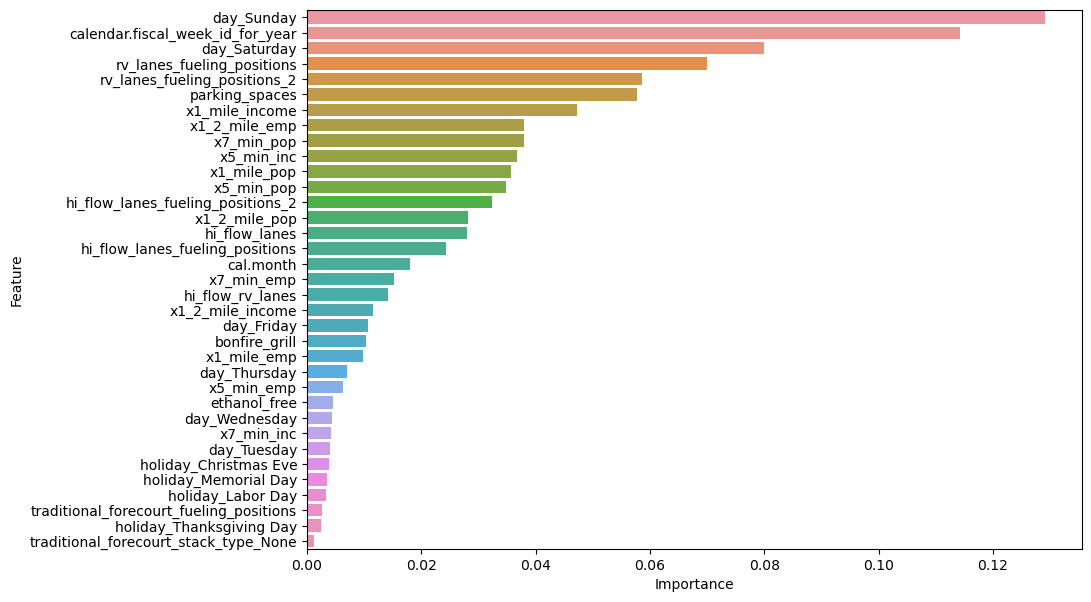

In [39]:
fs_regressor.feature_importances_
fs_feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, fs_regressor.feature_importances_):
    fs_feats[feature] = importance #add the name/value pair 
sorted_feats_fs = sorted(fs_feats.items(), key=lambda x:x[1], reverse=True)
sorted_feats_fs = pd.DataFrame(sorted_feats_fs, columns=['Feature', 'Importance'])

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=sorted_feats_fs[:35], x='Importance', y='Feature')
# sns.lineplot(data=results, x='num_features', y='val_score')

### Diesel RF

In [40]:
d_regressor=RandomForestRegressor(n_estimators=100, random_state=1234)
d_regressor.fit(X_train, y_train['diesel_x'])
print(d_regressor.score(X_train, y_train['diesel_x']))
preds = d_regressor.predict(X_val)
print(d_regressor.score(X_val, y_val['diesel_x']))
MSE = mean_squared_error(y_val['diesel_x'], preds)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_val['diesel_x'], preds)
diesel_error = abs(preds - y_val['diesel_x'])

print(MSE)
print(RMSE)
print(MAE)
print()
print(df['diesel_x'].describe())
print()
print(diesel_error.describe(np.linspace(0.1,1,num=10)))

0.9875953590097474
0.9102539409014434
157380.1397832539
396.7116582396513
216.9411489188404

count    13542.000000
mean      1738.726887
std       2178.764749
min         12.498500
25%        399.246750
50%       1083.677000
75%       2318.939000
max      20853.952000
Name: diesel_x, dtype: float64

count    2837.000000
mean      216.941149
std       332.198098
min         0.010255
10%        15.712312
20%        34.322449
30%        56.254842
40%        82.075203
50%       113.952965
60%       158.414242
70%       223.113240
80%       323.294419
90%       504.079646
100%     6522.018650
max      6522.018650
Name: diesel_x, dtype: float64


<Axes: xlabel='Importance', ylabel='Feature'>

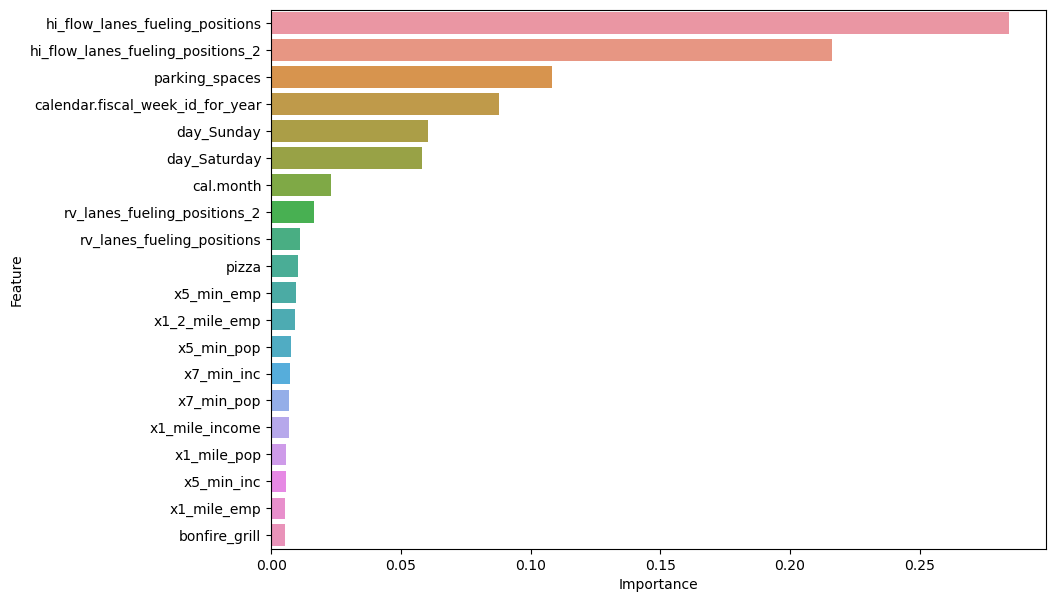

In [41]:
d_regressor.feature_importances_
d_feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, d_regressor.feature_importances_):
    d_feats[feature] = importance #add the name/value pair 
sorted_feats_d = sorted(d_feats.items(), key=lambda x:x[1], reverse=True)
sorted_feats_d = pd.DataFrame(sorted_feats_d, columns=['Feature', 'Importance'])

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=sorted_feats_d[:20], x='Importance', y='Feature')
# sns.lineplot(data=results, x='num_features', y='val_score')

### Unleaded Gasoline RF

In [42]:
u_regressor=RandomForestRegressor(n_estimators=100, random_state=1234)
u_regressor.fit(X_train, y_train['unleaded'])
print(u_regressor.score(X_train, y_train['unleaded']))
preds = u_regressor.predict(X_val)
print(u_regressor.score(X_val, y_val['unleaded']))
MSE = mean_squared_error(y_val['unleaded'], preds)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_val['unleaded'], preds)
unleaded_error = abs(preds - y_val['unleaded'])

print(MSE)
print(RMSE)
print(MAE)
print()
print(df['unleaded'].describe())
print()
print(unleaded_error.describe(np.linspace(0.1,1,num=10)))

0.9806408986530227
0.8888117476274081
124493.45494431985
352.8363004912049
224.2721107068646

count    13542.000000
mean      2389.507735
std       1036.115544
min        240.180500
25%       1648.426500
50%       2263.154250
75%       2950.668875
max       8077.233500
Name: unleaded, dtype: float64

count    2837.000000
mean      224.272111
std       272.436483
min         0.284865
10%        25.173589
20%        52.868340
30%        79.414426
40%       113.588573
50%       147.313005
60%       190.123521
70%       242.659424
80%       321.927599
90%       504.328335
100%     3893.971550
max      3893.971550
Name: unleaded, dtype: float64


<Axes: xlabel='Importance', ylabel='Feature'>

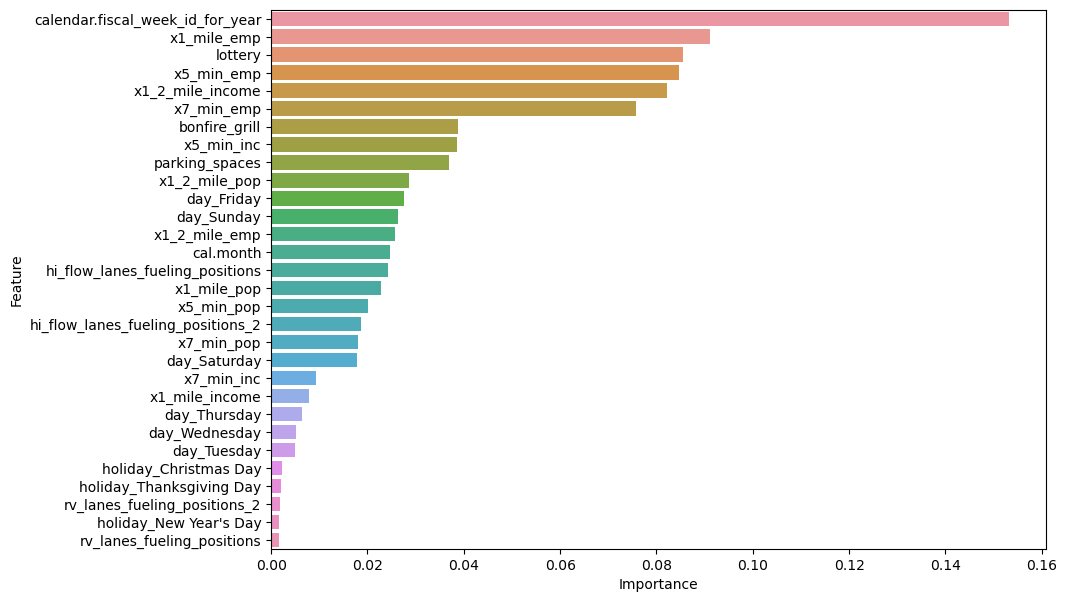

In [43]:
u_regressor.feature_importances_
u_feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, u_regressor.feature_importances_):
    u_feats[feature] = importance #add the name/value pair 
sorted_feats_u = sorted(u_feats.items(), key=lambda x:x[1], reverse=True)
sorted_feats_u = pd.DataFrame(sorted_feats_u, columns=['Feature', 'Importance'])

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=sorted_feats_u[:30], x='Importance', y='Feature')
# sns.lineplot(data=results, x='num_features', y='val_score')

It should be noted that Random Forest produced RMSE and MAE scores significantly lower than the ARIMA models.  As well as acceptably low absolute error values for the first 90% of predictions.  It was observed that there is a significant jump in the scale of error in the final 10% of all predictions, meaning that there are a small number of predictions that are unacceptably far from the actual value.  We will examine the repercussions of this at a later point.

## XGBoost

XGBoost is another tree-based regression algorithm that has been shown to be effective on similar problems in the past.  One major advantage of XGBoost over Random Forest is an increased ability to affect accuracy through hyperparameter tuning.  We therefore utilized XGBoost to build models and evaluated their performance.  To date, only minimal tuning has been achieved, but promising results from these early models warrant further efforts in this direction.  

In [44]:
params= {'objective': 'reg:squarederror', 'verbosity':0}

dtrain_reg = xgb.DMatrix(data=X_train, label=y_train['inside_sales'])
dtest_reg = xgb.DMatrix(data=X_val, label=y_val['inside_sales'])

evals = [(dtrain_reg, 'train'), (dtest_reg,'validation')]

is_xgb_model = xgb.train(params=params, 
                      dtrain=dtrain_reg, 
                      num_boost_round=250, 
                      evals=evals,
                      verbose_eval=10,
                      early_stopping_rounds=25)

dtrain_reg = xgb.DMatrix(data=X_train, label=y_train['food_service'])
dtest_reg = xgb.DMatrix(data=X_val, label=y_val['food_service'])

fs_xgb_model = xgb.train(params=params, 
                      dtrain=dtrain_reg, 
                      num_boost_round=250, 
                      evals=evals,
                      verbose_eval=10,
                      early_stopping_rounds=25)

dtrain_reg = xgb.DMatrix(data=X_train, label=y_train['diesel_x'])
dtest_reg = xgb.DMatrix(data=X_val, label=y_val['diesel_x'])

d_xgb_model = xgb.train(params=params, 
                      dtrain=dtrain_reg, 
                      num_boost_round=250, 
                      evals=evals,
                      verbose_eval=10,
                      early_stopping_rounds=25)

dtrain_reg = xgb.DMatrix(data=X_train, label=y_train['unleaded'])
dtest_reg = xgb.DMatrix(data=X_val, label=y_val['unleaded'])

u_xgb_model = xgb.train(params=params, 
                      dtrain=dtrain_reg, 
                      num_boost_round=250, 
                      evals=evals,
                      verbose_eval=10,
                      early_stopping_rounds=25)

[0]	train-rmse:2121.39960	validation-rmse:2084.34329
[10]	train-rmse:401.06071	validation-rmse:427.71544
[20]	train-rmse:337.23455	validation-rmse:382.82421
[30]	train-rmse:303.05360	validation-rmse:356.96091
[40]	train-rmse:290.30607	validation-rmse:349.31770
[50]	train-rmse:269.10426	validation-rmse:339.41959
[60]	train-rmse:256.83042	validation-rmse:332.85440
[70]	train-rmse:246.59081	validation-rmse:328.14992
[80]	train-rmse:236.94208	validation-rmse:321.98580
[90]	train-rmse:230.54443	validation-rmse:318.94962
[100]	train-rmse:222.18701	validation-rmse:315.57938
[110]	train-rmse:215.36322	validation-rmse:312.71194
[120]	train-rmse:212.06269	validation-rmse:311.46118
[130]	train-rmse:208.56667	validation-rmse:310.43276
[140]	train-rmse:204.55480	validation-rmse:309.75889
[150]	train-rmse:201.52726	validation-rmse:308.84397
[160]	train-rmse:199.33387	validation-rmse:308.67155
[170]	train-rmse:197.19296	validation-rmse:308.61075
[180]	train-rmse:193.21625	validation-rmse:308.01320
[1

## Examining Models on Test Data

After training the models on the training set of data, and then evaluating them based upon their performance on validation data.  Final evaluation was determined by using the models on 5 withheld stores, providing the models an opportunity to perform their intended task, predicting a year's worth of sales data in each of the 4 key sales segments with only store qualitative data and dates to work with.

In [45]:
test_df = test_df.sort_values('calendar.calendar_day_date')
print(test_df['site_id_msba'].value_counts())

22785    366
22925    366
23380    366
22680    366
23415    366
Name: site_id_msba, dtype: int64


In [46]:
test23415_df = test_df.loc[test_df['site_id_msba'] == 23415]

target_cols = target_cols = ['site_id_msba', 'calendar.calendar_day_date', 'inside_sales', 'food_service','diesel_x', 'unleaded']
X = test23415_df.drop(columns=target_cols)
y = pd.DataFrame(test23415_df[target_cols])
# Predict sales for Store 23415
is_pred = is_regressor.predict(X)
fs_pred = fs_regressor.predict(X)
d_pred = d_regressor.predict(X)
u_pred = u_regressor.predict(X)

test23415_df['is_pred'] = is_pred
test23415_df['fs_pred'] = fs_pred
test23415_df['diesel_pred'] = d_pred
test23415_df['unleaded_pred'] = u_pred

test23415_df['is_pred_err'] = test23415_df['is_pred'] - test23415_df['inside_sales']
test23415_df['fs_pred_err'] = test23415_df.fs_pred - test23415_df.food_service
test23415_df['diesel_pred_err'] = test23415_df.diesel_pred - test23415_df.diesel_x
test23415_df['unleaded_pred_err'] = test23415_df.unleaded_pred - test23415_df.unleaded

print('Annual Cumulative Error(Inside Sales): '  , test23415_df['is_pred_err'].sum())
print('Annual Cumulative Error % (Inside Sales): '  , (test23415_df['is_pred_err'].sum() / test23415_df['inside_sales'].sum()) * 100)
print('Annual Cumulative Error(Food Service): '  , test23415_df['fs_pred_err'].sum())
print('Annual Cumulative Error % (Food Service): '  , (test23415_df['fs_pred_err'].sum() / test23415_df['food_service'].sum()) * 100)
print('Annual Cumulative Error(Diesel Sales): '  , test23415_df['diesel_pred_err'].sum())
print('Annual Cumulative Error % (Diesel Sales): '  , (test23415_df['diesel_pred_err'].sum() / test23415_df['diesel_x'].sum()) * 100)
print('Annual Cumulative Error(Unleaded Sales): ', test23415_df['unleaded_pred_err'].sum())
print('Annual Cumulative Error % (Unleaded Sales): '  , (test23415_df['unleaded_pred_err'].sum() / test23415_df['unleaded'].sum()) * 100)

Annual Cumulative Error(Inside Sales):  281874.1526474998
Annual Cumulative Error % (Inside Sales):  20.49355118280138
Annual Cumulative Error(Food Service):  97267.79024275005
Annual Cumulative Error % (Food Service):  22.66919884350294
Annual Cumulative Error(Diesel Sales):  123778.10128716663
Annual Cumulative Error % (Diesel Sales):  13.667944766147269
Annual Cumulative Error(Unleaded Sales):  499192.60532925
Annual Cumulative Error % (Unleaded Sales):  78.51942666386427


In [47]:
test23380_df = test_df.loc[test_df['site_id_msba'] == 23380]

target_cols = target_cols = ['site_id_msba', 'calendar.calendar_day_date', 'inside_sales', 'food_service','diesel_x', 'unleaded']
X = test23380_df.drop(columns=target_cols)
y = pd.DataFrame(test23380_df[target_cols])
# Predict sales for Store 23380
is_pred = is_regressor.predict(X)
fs_pred = fs_regressor.predict(X)
d_pred = d_regressor.predict(X)
u_pred = u_regressor.predict(X)

test23380_df['is_pred'] = is_pred
test23380_df['fs_pred'] = fs_pred
test23380_df['diesel_pred'] = d_pred
test23380_df['unleaded_pred'] = u_pred

test23380_df['is_pred_err'] = test23380_df['is_pred'] - test23380_df['inside_sales']
test23380_df['fs_pred_err'] = test23380_df.fs_pred - test23380_df.food_service
test23380_df['diesel_pred_err'] = test23380_df.diesel_pred - test23380_df.diesel_x
test23380_df['unleaded_pred_err'] = test23380_df.unleaded_pred - test23380_df.unleaded

print('Annual Cumulative Error(Inside Sales): '  , test23380_df['is_pred_err'].sum())
print('Annual Cumulative Error % (Inside Sales): '  , (test23380_df['is_pred_err'].sum() / test23380_df['inside_sales'].sum()) * 100)
print('Annual Cumulative Error(Food Service): '  , test23380_df['fs_pred_err'].sum())
print('Annual Cumulative Error % (Food Service): '  , (test23380_df['fs_pred_err'].sum() / test23380_df['food_service'].sum()) * 100)
print('Annual Cumulative Error(Diesel Sales): '  , test23380_df['diesel_pred_err'].sum())
print('Annual Cumulative Error % (Diesel Sales): '  , (test23380_df['diesel_pred_err'].sum() / test23380_df['diesel_x'].sum()) * 100)
print('Annual Cumulative Error(Unleaded Sales): ', test23380_df['unleaded_pred_err'].sum())
print('Annual Cumulative Error % (Unleaded Sales): '  , (test23380_df['unleaded_pred_err'].sum() / test23380_df['unleaded'].sum()) * 100)

Annual Cumulative Error(Inside Sales):  -66173.64245858326
Annual Cumulative Error % (Inside Sales):  -5.584189930677689
Annual Cumulative Error(Food Service):  -1458.6446874999892
Annual Cumulative Error % (Food Service):  -0.4085809378011314
Annual Cumulative Error(Diesel Sales):  -158937.05274908335
Annual Cumulative Error % (Diesel Sales):  -20.469398720660664
Annual Cumulative Error(Unleaded Sales):  -276754.1586786667
Annual Cumulative Error % (Unleaded Sales):  -26.10574664586125


In [48]:
test22925_df = test_df.loc[test_df['site_id_msba'] == 22925]

target_cols = ['site_id_msba', 'calendar.calendar_day_date', 'inside_sales', 'food_service','diesel_x', 'unleaded']
X = test22925_df.drop(columns=target_cols)
y = pd.DataFrame(test22925_df[target_cols])
dtest_reg = xgb.DMatrix(data=X, label=y['inside_sales'])
# Predict sales for Store 22925
is_pred = is_regressor.predict(X)
fs_pred = fs_regressor.predict(X)
d_pred = d_regressor.predict(X)
u_pred = u_regressor.predict(X)
is_pred_xgb = is_xgb_model.predict(dtest_reg)
fs_pred_xgb = fs_xgb_model.predict(dtest_reg)
d_pred_xgb = d_xgb_model.predict(dtest_reg)
u_pred_xgb = u_xgb_model.predict(dtest_reg)

test22925_df['is_pred'] = is_pred
test22925_df['fs_pred'] = fs_pred
test22925_df['diesel_pred'] = d_pred
test22925_df['unleaded_pred'] = u_pred
test22925_df['is_pred_xgb'] = is_pred_xgb
test22925_df['fs_pred_xgb'] = fs_pred_xgb
test22925_df['diesel_pred_xgb'] = d_pred_xgb
test22925_df['unleaded_pred_xgb'] = u_pred_xgb

test22925_df['is_pred_err'] = test22925_df['is_pred'] - test22925_df['inside_sales']
test22925_df['fs_pred_err'] = test22925_df.fs_pred - test22925_df.food_service
test22925_df['diesel_pred_err'] = test22925_df.diesel_pred - test22925_df.diesel_x
test22925_df['unleaded_pred_err'] = test22925_df.unleaded_pred - test22925_df.unleaded

print('Annual Cumulative Error(Inside Sales): '  , test22925_df['is_pred_err'].sum())
print('Annual Cumulative Error % (Inside Sales): '  , (test22925_df['is_pred_err'].sum() / test22925_df['inside_sales'].sum()) * 100)
print('Annual Cumulative Error(Food Service): '  , test22925_df['fs_pred_err'].sum())
print('Annual Cumulative Error % (Food Service): '  , (test22925_df['fs_pred_err'].sum() / test22925_df['food_service'].sum()) * 100)
print('Annual Cumulative Error(Diesel Sales): '  , test22925_df['diesel_pred_err'].sum())
print('Annual Cumulative Error % (Diesel Sales): '  , (test22925_df['diesel_pred_err'].sum() / test22925_df['diesel_x'].sum()) * 100)
print('Annual Cumulative Error(Unleaded Sales): ', test22925_df['unleaded_pred_err'].sum())
print('Annual Cumulative Error % (Unleaded Sales): '  , (test22925_df['unleaded_pred_err'].sum() / test22925_df['unleaded'].sum()) * 100)

Annual Cumulative Error(Inside Sales):  -251313.7100285
Annual Cumulative Error % (Inside Sales):  -24.277211217161046
Annual Cumulative Error(Food Service):  -67845.01674183333
Annual Cumulative Error % (Food Service):  -31.355763148136578
Annual Cumulative Error(Diesel Sales):  28574.809545749988
Annual Cumulative Error % (Diesel Sales):  40.44754855505777
Annual Cumulative Error(Unleaded Sales):  -122149.14386966662
Annual Cumulative Error % (Unleaded Sales):  -18.139122824402698


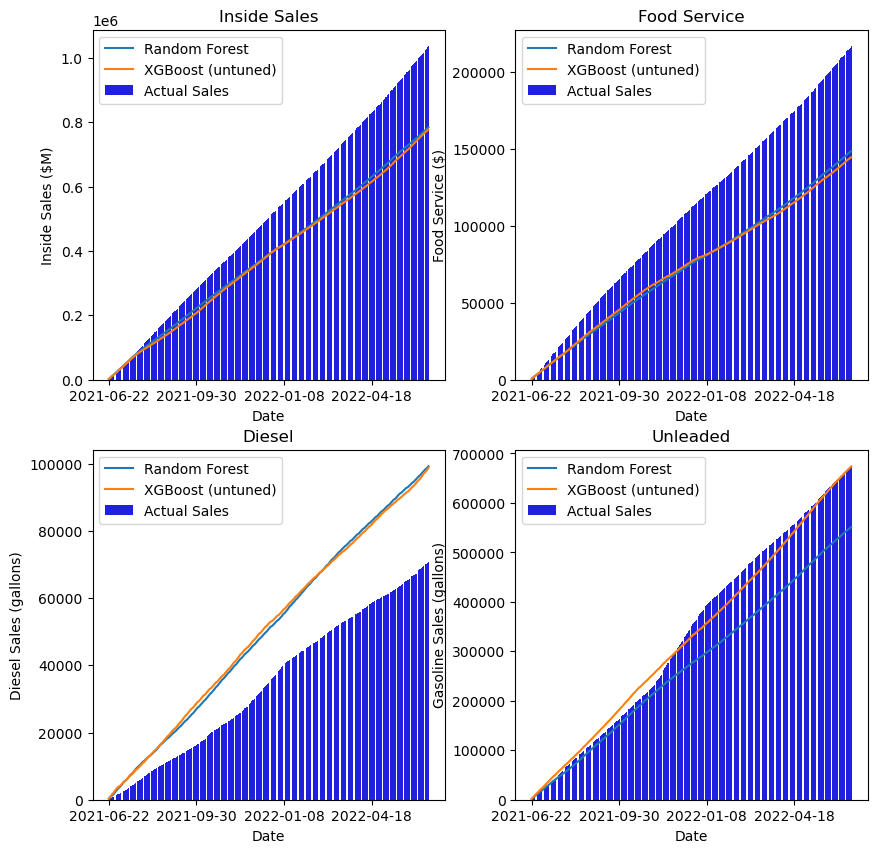

In [49]:
fig, axes = plt.subplots(2,2,figsize=(10, 10))

sns.barplot(data=test22925_df, 
             x= 'calendar.calendar_day_date', 
             y= test22925_df['inside_sales'].cumsum(), 
             label= 'Actual Sales',
             ax= axes[0,0],
             color='blue')
sns.lineplot(data=test22925_df, 
             x='calendar.calendar_day_date', 
             y=test22925_df['is_pred'].cumsum(), 
             label='Random Forest', 
             ax= axes[0,0])
sns.lineplot(data=test22925_df, 
             x='calendar.calendar_day_date', 
             y=test22925_df['is_pred_xgb'].cumsum(), 
             label='XGBoost (untuned)', 
             ax= axes[0,0])
axes[0,0].set_title('Inside Sales')
axes[0,0].set(xlabel='Date', ylabel='Inside Sales ($M)')
axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(5))
axes[0,0].set_title('Inside Sales')
sns.barplot(data=test22925_df, 
             x= 'calendar.calendar_day_date', 
             y= test22925_df['food_service'].cumsum(), 
             label= 'Actual Sales',
             ax= axes[0,1],
             color='blue')
sns.lineplot(data=test22925_df, 
             x='calendar.calendar_day_date', 
             y=test22925_df['fs_pred'].cumsum(), 
             label='Random Forest', 
             ax= axes[0,1])
sns.lineplot(data=test22925_df, 
             x='calendar.calendar_day_date', 
             y=test22925_df['fs_pred_xgb'].cumsum(), 
             label='XGBoost (untuned)', 
             ax= axes[0,1])
axes[0,1].set_title('Food Service')
axes[0,1].set(xlabel='Date', ylabel='Food Service ($)')
axes[0,1].xaxis.set_major_locator(plt.MaxNLocator(5))
sns.barplot(data=test22925_df, 
             x= 'calendar.calendar_day_date', 
             y= test22925_df['diesel_x'].cumsum(), 
             label= 'Actual Sales',
             ax= axes[1,0],
             color='blue')
sns.lineplot(data=test22925_df, 
             x='calendar.calendar_day_date', 
             y=test22925_df['diesel_pred'].cumsum(), 
             label='Random Forest', 
             ax= axes[1,0])
sns.lineplot(data=test22925_df, 
             x='calendar.calendar_day_date', 
             y=test22925_df['diesel_pred_xgb'].cumsum(), 
             label='XGBoost (untuned)', 
             ax= axes[1,0])
axes[1,0].set_title('Diesel')
axes[1,0].set(xlabel='Date', ylabel='Diesel Sales (gallons)')
axes[1,0].xaxis.set_major_locator(plt.MaxNLocator(5))
sns.barplot(data=test22925_df, 
             x= 'calendar.calendar_day_date', 
             y= test22925_df['unleaded'].cumsum(), 
             label= 'Actual Sales',
             ax= axes[1,1],
             color='blue')
sns.lineplot(data=test22925_df, 
             x='calendar.calendar_day_date', 
             y=test22925_df['unleaded_pred'].cumsum(), 
             label='Random Forest', 
             ax= axes[1,1])
sns.lineplot(data=test22925_df, 
             x='calendar.calendar_day_date', 
             y=test22925_df['unleaded_pred_xgb'].cumsum(), 
             label='XGBoost (untuned)', 
             ax= axes[1,1])
axes[1,1].set_title('Unleaded')
axes[1,1].set(xlabel='Date', ylabel='Gasoline Sales (gallons)')
axes[1,1].xaxis.set_major_locator(plt.MaxNLocator(5))

In [50]:
test22785_df = test_df.loc[test_df['site_id_msba'] == 22785]

target_cols = target_cols = ['site_id_msba', 'calendar.calendar_day_date', 'inside_sales', 'food_service','diesel_x', 'unleaded']
X = test22785_df.drop(columns=target_cols)
y = pd.DataFrame(test22785_df[target_cols])
# Predict sales for Store 22785
is_pred = is_regressor.predict(X)
fs_pred = fs_regressor.predict(X)
d_pred = d_regressor.predict(X)
u_pred = u_regressor.predict(X)

test22785_df['is_pred'] = is_pred
test22785_df['fs_pred'] = fs_pred
test22785_df['diesel_pred'] = d_pred
test22785_df['unleaded_pred'] = u_pred
test22785_df['is_pred_xgb'] = is_pred_xgb
test22785_df['fs_pred_xgb'] = fs_pred_xgb
test22785_df['diesel_pred_xgb'] = d_pred_xgb
test22785_df['unleaded_pred_xgb'] = u_pred_xgb

test22785_df['is_pred_err'] = test22785_df['is_pred'] - test22785_df['inside_sales']
test22785_df['fs_pred_err'] = test22785_df.fs_pred - test22785_df.food_service
test22785_df['diesel_pred_err'] = test22785_df.diesel_pred - test22785_df.diesel_x
test22785_df['unleaded_pred_err'] = test22785_df.unleaded_pred - test22785_df.unleaded

print('Annual Cumulative Error(Inside Sales): '  , test22785_df['is_pred_err'].sum())
print('Annual Cumulative Error % (Inside Sales): '  , (test22785_df['is_pred_err'].sum() / test22785_df['inside_sales'].sum()) * 100)
print('Annual Cumulative Error(Food Service): '  , test22785_df['fs_pred_err'].sum())
print('Annual Cumulative Error % (Food Service): '  , (test22785_df['fs_pred_err'].sum() / test22785_df['food_service'].sum()) * 100)
print('Annual Cumulative Error(Diesel Sales): '  , test22785_df['diesel_pred_err'].sum())
print('Annual Cumulative Error % (Diesel Sales): '  , (test22785_df['diesel_pred_err'].sum() / test22785_df['diesel_x'].sum()) * 100)
print('Annual Cumulative Error(Unleaded Sales): ', test22785_df['unleaded_pred_err'].sum())
print('Annual Cumulative Error % (Unleaded Sales): '  , (test22785_df['unleaded_pred_err'].sum() / test22785_df['unleaded'].sum()) * 100)

Annual Cumulative Error(Inside Sales):  217860.75392841658
Annual Cumulative Error % (Inside Sales):  21.595302918763362
Annual Cumulative Error(Food Service):  -14068.027190583334
Annual Cumulative Error % (Food Service):  -4.557428620479903
Annual Cumulative Error(Diesel Sales):  -51601.3983193334
Annual Cumulative Error % (Diesel Sales):  -5.279838007185921
Annual Cumulative Error(Unleaded Sales):  47638.7338256667
Annual Cumulative Error % (Unleaded Sales):  6.017576740917542


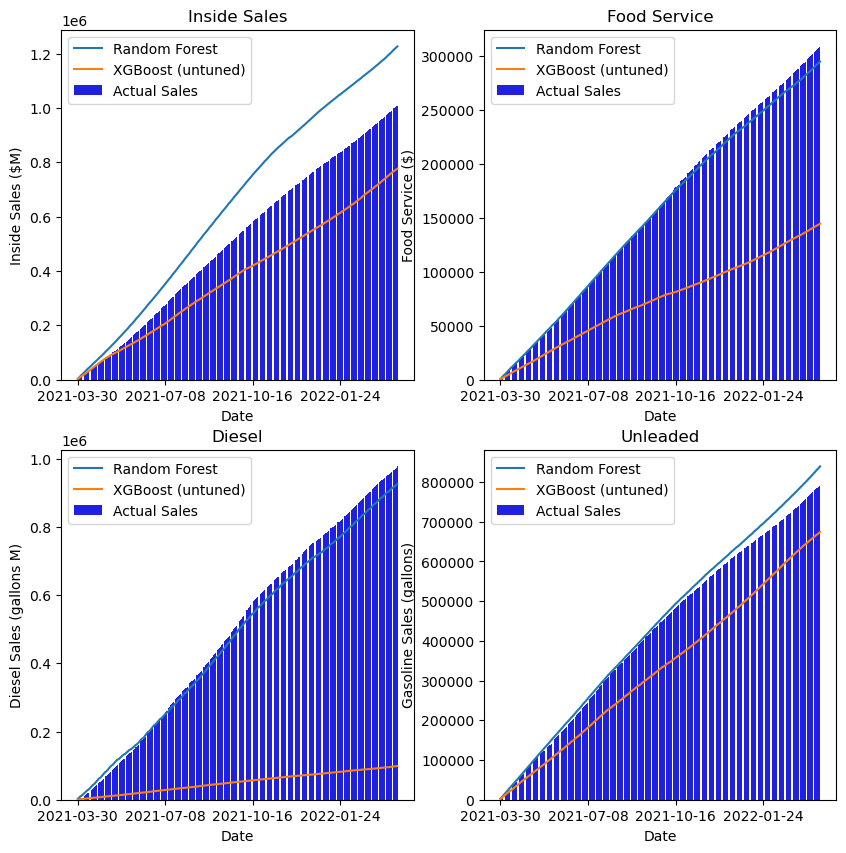

In [51]:
fig, axes = plt.subplots(2,2,figsize=(10, 10))

sns.barplot(data=test22785_df, 
             x= 'calendar.calendar_day_date', 
             y= test22785_df['inside_sales'].cumsum(), 
             label= 'Actual Sales',
             ax= axes[0,0],
             color='blue')
sns.lineplot(data=test22785_df, 
             x='calendar.calendar_day_date', 
             y=test22785_df['is_pred'].cumsum(), 
             label='Random Forest', 
             ax= axes[0,0])
sns.lineplot(data=test22785_df, 
             x='calendar.calendar_day_date', 
             y=test22785_df['is_pred_xgb'].cumsum(), 
             label='XGBoost (untuned)', 
             ax= axes[0,0])
axes[0,0].set_title('Inside Sales')
axes[0,0].set(xlabel='Date', ylabel='Inside Sales ($M)')
axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(5))
axes[0,0].set_title('Inside Sales')
sns.barplot(data=test22785_df, 
             x= 'calendar.calendar_day_date', 
             y= test22785_df['food_service'].cumsum(), 
             label= 'Actual Sales',
             ax= axes[0,1],
             color='blue')
sns.lineplot(data=test22785_df, 
             x='calendar.calendar_day_date', 
             y=test22785_df['fs_pred'].cumsum(), 
             label='Random Forest', 
             ax= axes[0,1])
sns.lineplot(data=test22785_df, 
             x='calendar.calendar_day_date', 
             y=test22785_df['fs_pred_xgb'].cumsum(), 
             label='XGBoost (untuned)', 
             ax= axes[0,1])
axes[0,1].set_title('Food Service')
axes[0,1].set(xlabel='Date', ylabel='Food Service ($)')
axes[0,1].xaxis.set_major_locator(plt.MaxNLocator(5))
sns.barplot(data=test22785_df, 
             x= 'calendar.calendar_day_date', 
             y= test22785_df['diesel_x'].cumsum(), 
             label= 'Actual Sales',
             ax= axes[1,0],
             color='blue')
sns.lineplot(data=test22785_df, 
             x='calendar.calendar_day_date', 
             y=test22785_df['diesel_pred'].cumsum(), 
             label='Random Forest', 
             ax= axes[1,0])
sns.lineplot(data=test22785_df, 
             x='calendar.calendar_day_date', 
             y=test22785_df['diesel_pred_xgb'].cumsum(), 
             label='XGBoost (untuned)', 
             ax= axes[1,0])
axes[1,0].set_title('Diesel')
axes[1,0].set(xlabel='Date', ylabel='Diesel Sales (gallons M)')
axes[1,0].xaxis.set_major_locator(plt.MaxNLocator(5))
sns.barplot(data=test22785_df, 
             x= 'calendar.calendar_day_date', 
             y= test22785_df['unleaded'].cumsum(), 
             label= 'Actual Sales',
             ax= axes[1,1],
             color='blue')
sns.lineplot(data=test22785_df, 
             x='calendar.calendar_day_date', 
             y=test22785_df['unleaded_pred'].cumsum(), 
             label='Random Forest', 
             ax= axes[1,1])
sns.lineplot(data=test22785_df, 
             x='calendar.calendar_day_date', 
             y=test22785_df['unleaded_pred_xgb'].cumsum(), 
             label='XGBoost (untuned)', 
             ax= axes[1,1])
axes[1,1].set_title('Unleaded')
axes[1,1].set(xlabel='Date', ylabel='Gasoline Sales (gallons)')
axes[1,1].xaxis.set_major_locator(plt.MaxNLocator(5))

In [52]:
test22680_df = test_df.loc[test_df['site_id_msba'] == 22680]

target_cols = target_cols = ['site_id_msba', 'calendar.calendar_day_date', 'inside_sales', 'food_service','diesel_x', 'unleaded']
X = test22680_df.drop(columns=target_cols)
y = pd.DataFrame(test22680_df[target_cols])
dtest_reg = xgb.DMatrix(data=X, label=y['inside_sales'])
# Predict sales for Store 22785
is_pred = is_regressor.predict(X)
fs_pred = fs_regressor.predict(X)
d_pred = d_regressor.predict(X)
u_pred = u_regressor.predict(X)
is_pred_xgb = is_xgb_model.predict(dtest_reg)
fs_pred_xgb = fs_xgb_model.predict(dtest_reg)
d_pred_xgb = d_xgb_model.predict(dtest_reg)
u_pred_xgb = u_xgb_model.predict(dtest_reg)

test22680_df['is_pred'] = is_pred
test22680_df['fs_pred'] = fs_pred
test22680_df['diesel_pred'] = d_pred
test22680_df['unleaded_pred'] = u_pred
test22680_df['is_pred_xgb'] = is_pred_xgb
test22680_df['fs_pred_xgb'] = fs_pred_xgb
test22680_df['diesel_pred_xgb'] = d_pred_xgb
test22680_df['unleaded_pred_xgb'] = u_pred_xgb

test22680_df['is_pred_err'] = test22680_df['is_pred'] - test22680_df['inside_sales']
test22680_df['fs_pred_err'] = test22680_df.fs_pred - test22680_df.food_service
test22680_df['diesel_pred_err'] = test22680_df.diesel_pred - test22680_df.diesel_x
test22680_df['unleaded_pred_err'] = test22680_df.unleaded_pred - test22680_df.unleaded
test22680_df['is_pred_xgb_err'] = test22680_df['is_pred_xgb'] - test22680_df['inside_sales']
test22680_df['fs_pred_xgb_err'] = test22680_df.fs_pred_xgb - test22680_df.food_service
test22680_df['diesel_pred_xgb_err'] = test22680_df.diesel_pred_xgb - test22680_df.diesel_x
test22680_df['unleaded_pred_xgb_err'] = test22680_df.unleaded_pred_xgb - test22680_df.unleaded

print('Annual Cumulative Error(Inside Sales): '  , test22680_df['is_pred_err'].sum())
print('Annual Cumulative Error % (Inside Sales): '  , (test22680_df['is_pred_err'].sum() / test22680_df['inside_sales'].sum()) * 100)
print('Annual Cumulative Error(Food Service): '  , test22680_df['fs_pred_err'].sum())
print('Annual Cumulative Error % (Food Service): '  , (test22680_df['fs_pred_err'].sum() / test22680_df['food_service'].sum()) * 100)
print('Annual Cumulative Error(Diesel Sales): '  , test22680_df['diesel_pred_err'].sum())
print('Annual Cumulative Error % (Diesel Sales): '  , (test22680_df['diesel_pred_err'].sum() / test22680_df['diesel_x'].sum()) * 100)
print('Annual Cumulative Error(Unleaded Sales): ', test22680_df['unleaded_pred_err'].sum())
print('Annual Cumulative Error % (Unleaded Sales): '  , (test22680_df['unleaded_pred_err'].sum() / test22680_df['unleaded'].sum()) * 100)
print('Annual Cumulative Error(Inside Sales)[XGBoost]: '  , test22680_df['is_pred_xgb_err'].sum())
print('Annual Cumulative Error % (Inside Sales): '  , (test22680_df['is_pred_xgb_err'].sum() / test22680_df['inside_sales'].sum()) * 100)
print('Annual Cumulative Error(Food Service)[XGBoost]: '  , test22680_df['fs_pred_xgb_err'].sum())
print('Annual Cumulative Error % (Food Service): '  , (test22680_df['fs_pred_xgb_err'].sum() / test22680_df['food_service'].sum()) * 100)
print('Annual Cumulative Error(Diesel Sales)[XGBoost]: '  , test22680_df['diesel_pred_xgb_err'].sum())
print('Annual Cumulative Error % (Diesel Sales): '  , (test22680_df['diesel_pred_xgb_err'].sum() / test22680_df['diesel_x'].sum()) * 100)
print('Annual Cumulative Error(Unleaded Sales)[XGBoost]: '  , test22680_df['unleaded_pred_xgb_err'].sum())
print('Annual Cumulative Error % (Unleaded Sales): '  , (test22680_df['unleaded_pred_xgb_err'].sum() / test22680_df['unleaded'].sum()) * 100)


Annual Cumulative Error(Inside Sales):  746936.6136073333
Annual Cumulative Error % (Inside Sales):  84.42001342278346
Annual Cumulative Error(Food Service):  19183.65160191667
Annual Cumulative Error % (Food Service):  9.808250161753131
Annual Cumulative Error(Diesel Sales):  51766.67215633333
Annual Cumulative Error % (Diesel Sales):  100.29678996864033
Annual Cumulative Error(Unleaded Sales):  254031.72900291663
Annual Cumulative Error % (Unleaded Sales):  71.7180528592575
Annual Cumulative Error(Inside Sales)[XGBoost]:  593536.5177070312
Annual Cumulative Error % (Inside Sales):  67.0824804661146
Annual Cumulative Error(Food Service)[XGBoost]:  35741.61428308106
Annual Cumulative Error % (Food Service):  18.2740336067364
Annual Cumulative Error(Diesel Sales)[XGBoost]:  63329.331850646966
Annual Cumulative Error % (Diesel Sales):  122.6991890901677
Annual Cumulative Error(Unleaded Sales)[XGBoost]:  260332.00942163085
Annual Cumulative Error % (Unleaded Sales):  73.4967434420087


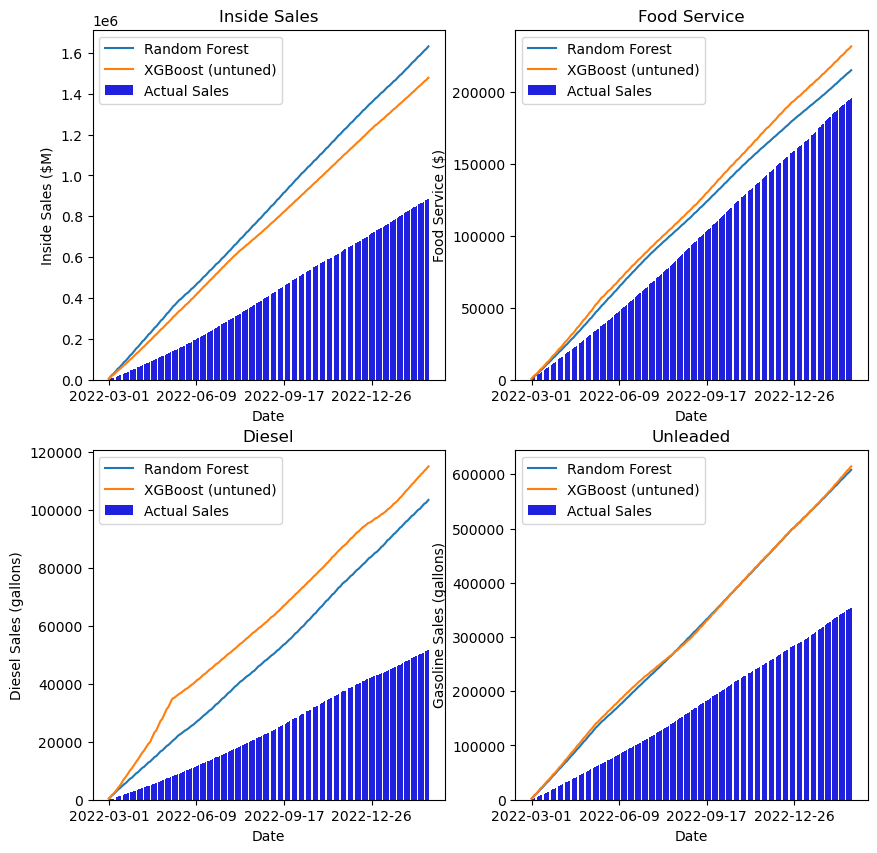

In [53]:
fig, axes = plt.subplots(2,2,figsize=(10, 10))

sns.barplot(data=test22680_df, 
             x= 'calendar.calendar_day_date', 
             y= test22680_df['inside_sales'].cumsum(), 
             label= 'Actual Sales',
             ax= axes[0,0],
             color='blue')
sns.lineplot(data=test22680_df, 
             x='calendar.calendar_day_date', 
             y=test22680_df['is_pred'].cumsum(), 
             label='Random Forest', 
             ax= axes[0,0])
sns.lineplot(data=test22680_df, 
             x='calendar.calendar_day_date', 
             y=test22680_df['is_pred_xgb'].cumsum(), 
             label='XGBoost (untuned)', 
             ax= axes[0,0])
axes[0,0].set_title('Inside Sales')
axes[0,0].set(xlabel='Date', ylabel='Inside Sales ($M)')
axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(5))
axes[0,0].set_title('Inside Sales')
sns.barplot(data=test22680_df, 
             x= 'calendar.calendar_day_date', 
             y= test22680_df['food_service'].cumsum(), 
             label= 'Actual Sales',
             ax= axes[0,1],
             color='blue')
sns.lineplot(data=test22680_df, 
             x='calendar.calendar_day_date', 
             y=test22680_df['fs_pred'].cumsum(), 
             label='Random Forest', 
             ax= axes[0,1])
sns.lineplot(data=test22680_df, 
             x='calendar.calendar_day_date', 
             y=test22680_df['fs_pred_xgb'].cumsum(), 
             label='XGBoost (untuned)', 
             ax= axes[0,1])
axes[0,1].set_title('Food Service')
axes[0,1].set(xlabel='Date', ylabel='Food Service ($)')
axes[0,1].xaxis.set_major_locator(plt.MaxNLocator(5))
sns.barplot(data=test22680_df, 
             x= 'calendar.calendar_day_date', 
             y= test22680_df['diesel_x'].cumsum(), 
             label= 'Actual Sales',
             ax= axes[1,0],
             color='blue')
sns.lineplot(data=test22680_df, 
             x='calendar.calendar_day_date', 
             y=test22680_df['diesel_pred'].cumsum(), 
             label='Random Forest', 
             ax= axes[1,0])
sns.lineplot(data=test22680_df, 
             x='calendar.calendar_day_date', 
             y=test22680_df['diesel_pred_xgb'].cumsum(), 
             label='XGBoost (untuned)', 
             ax= axes[1,0])
axes[1,0].set_title('Diesel')
axes[1,0].set(xlabel='Date', ylabel='Diesel Sales (gallons)')
axes[1,0].xaxis.set_major_locator(plt.MaxNLocator(5))
sns.barplot(data=test22680_df, 
             x= 'calendar.calendar_day_date', 
             y= test22680_df['unleaded'].cumsum(), 
             label= 'Actual Sales',
             ax= axes[1,1],
             color='blue')
sns.lineplot(data=test22680_df, 
             x='calendar.calendar_day_date', 
             y=test22680_df['unleaded_pred'].cumsum(), 
             label='Random Forest', 
             ax= axes[1,1])
sns.lineplot(data=test22680_df, 
             x='calendar.calendar_day_date', 
             y=test22680_df['unleaded_pred_xgb'].cumsum(), 
             label='XGBoost (untuned)', 
             ax= axes[1,1])
axes[1,1].set_title('Unleaded')
axes[1,1].set(xlabel='Date', ylabel='Gasoline Sales (gallons)')
axes[1,1].xaxis.set_major_locator(plt.MaxNLocator(5))


It became quickly apparent that the models are suffering from a significant level of error when cumulatively added together over the course of a calendar year.  In addition, the effect of those few outlier errors is magnified in that a single day with a large scale error is propogated across the rest of the year so any significant error is magnified.  

It was also apparent that the models did well against some segments while failing badly at others.  Of particular note is that it is not consistent which model performs better on which sales segment, nor is it consistent that a given model type is better at any given sales segment than the other.  While limited hyperparameter tuning was available and attempted with Random Forest, the default hyperparameters consistently outperformed any modifications.  However, there is still an opportunity to conduct a signficant amount of optimization of the hyperparameter tuning in regards to XGBoost.  Future efforts will be focused in this direction.

## Results

Time series modelling was effective at capturing the seasonality observed in the training data.  However predicted values displayed large RMSE values, our model evaluation metric.  We therefore decided to pursue other model paradigms. Our modelling showed that Random Forest tree models performed the best in terms of RMSE, which we used as our model evaluation metric.  Results for Inside Sales (333.76), Food Service (101.04), Diesel (369.71), and Unleaded Gasoline (352.84) outperformed all other models on the validation data set.  XGBoost showed some promise by outperforming Random Forest on Inside Sales (309.17), even though it didn't match the results in other sales components.  Further examination of model performance on the test data set, comprised of 5 stores,  showed that XGBoost models gave comparable results even though the current model has undergone minimal hyperparameter tuning.  Further work in this area will likely lead to improved accuracy of XGBoost models.  

In addition, Feature Importance and the elimination of features with low importance had a dramatic effect on the accuracy of both types of tree models (data not shown).  We believe that a possible path forward is to use an optimized XGBoost model to produce predicted sales which can then inform a time series model which can improve the models performance in regards to seasonality.  This predicted data could then be slowly replaced by actual sales data, which would allow our model to satisfy one of the key aspects of the original business problem.

## Appendix 1

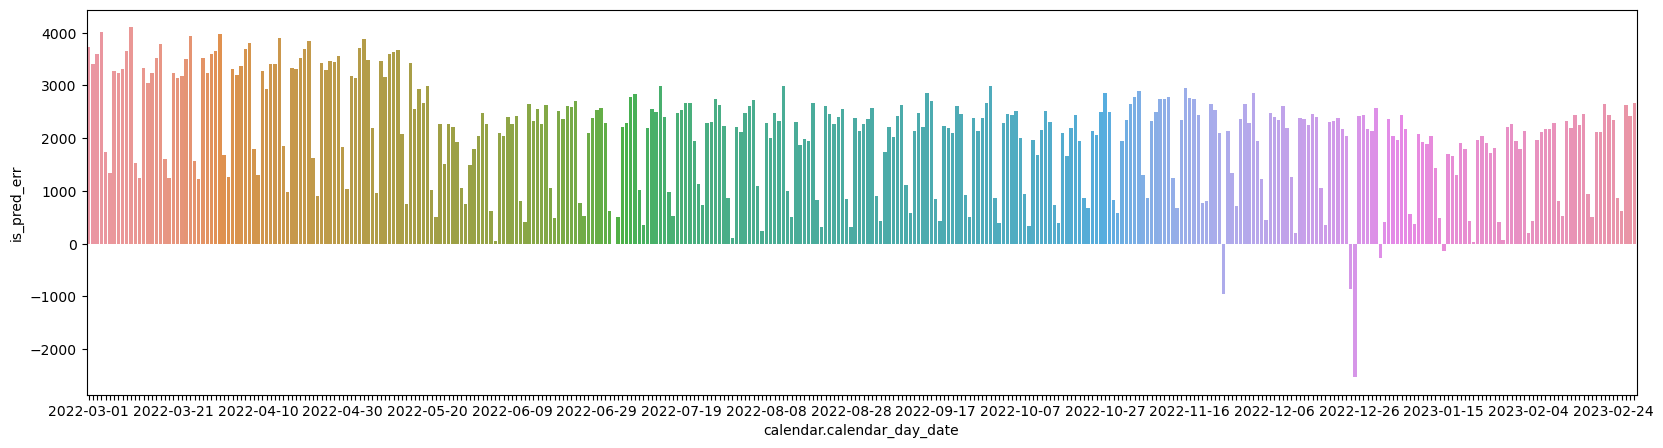

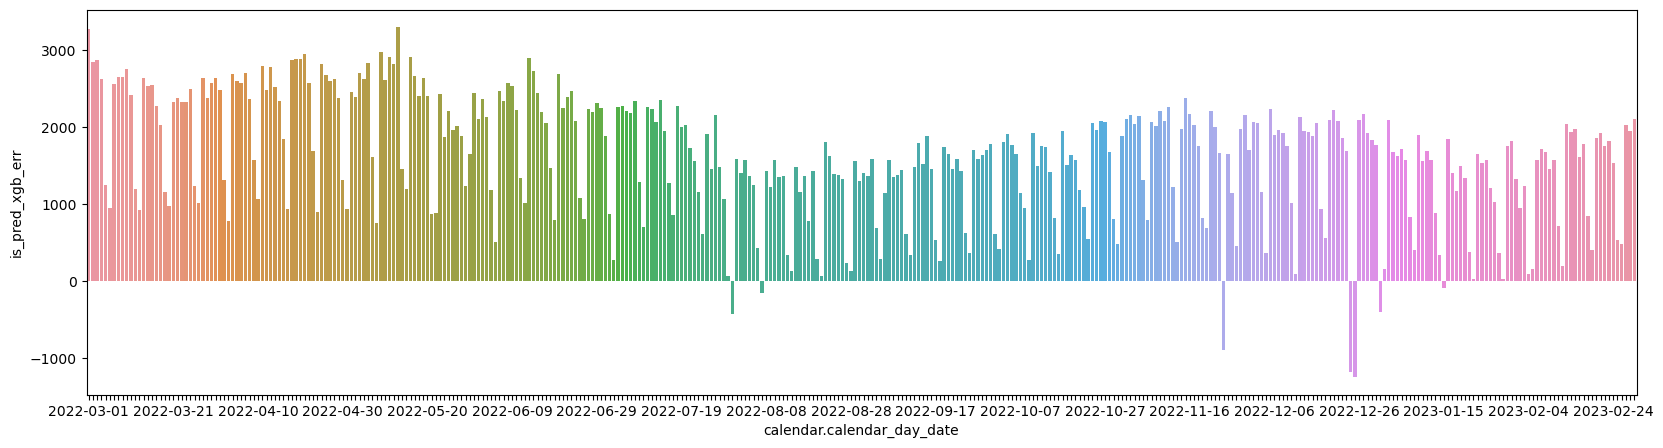

In [54]:
plt.subplots(figsize=(20, 5))
isRF = sns.barplot(data=test22680_df, 
             x= 'calendar.calendar_day_date', 
             y= test22680_df['is_pred_err'])
for ind, label in enumerate(isRF.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()
plt.subplots(figsize=(20, 5))
isXG = sns.barplot(data=test22680_df, 
             x= 'calendar.calendar_day_date', 
             y= test22680_df['is_pred_xgb_err'])
for ind, label in enumerate(isXG.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

Inside Sales models seem to have captured annual seasonality, but not weekly seasonality.

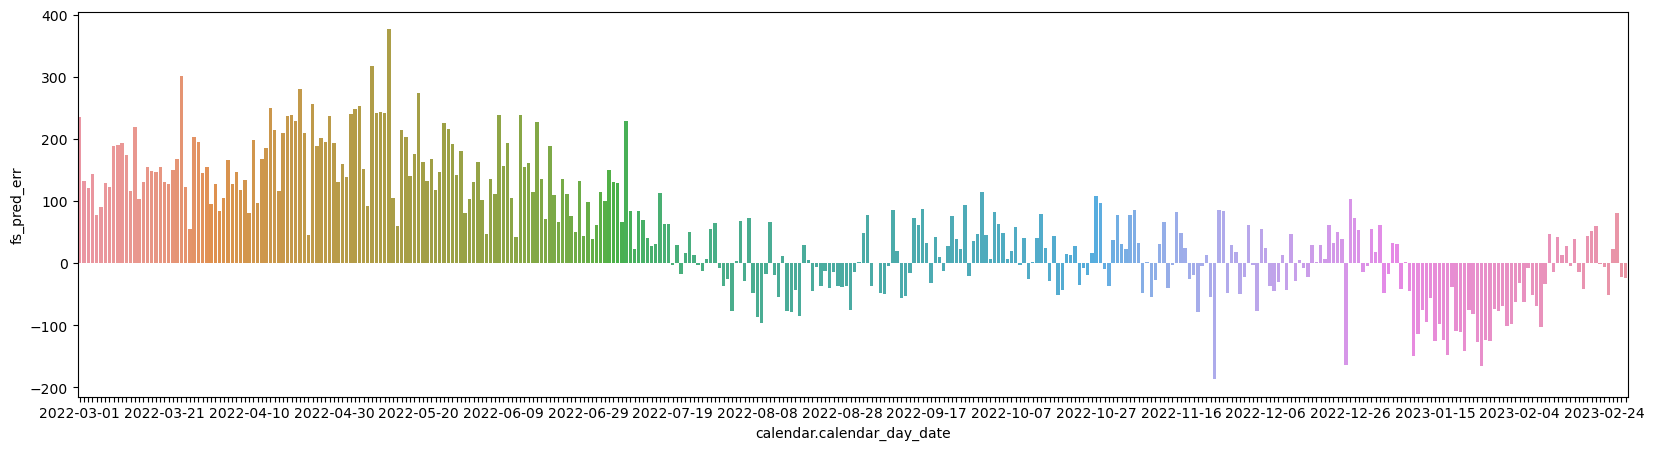

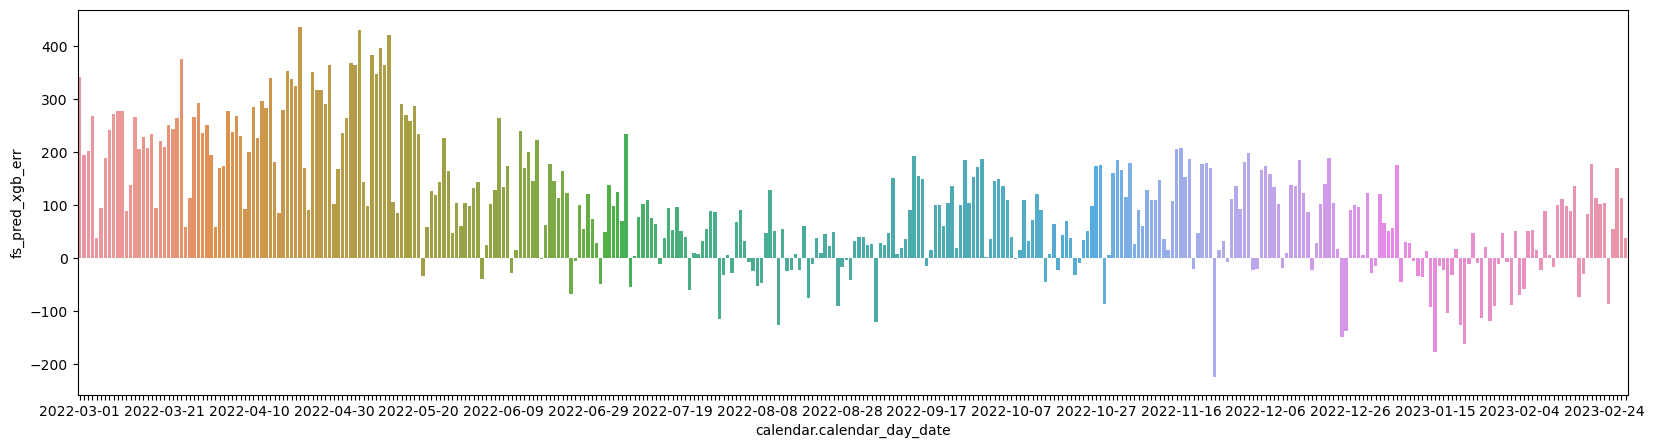

In [55]:
plt.subplots(figsize=(20, 5))
fsRF = sns.barplot(data=test22680_df, 
             x= 'calendar.calendar_day_date', 
             y= test22680_df['fs_pred_err'])
for ind, label in enumerate(fsRF.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()
plt.subplots(figsize=(20, 5))
fsXG = sns.barplot(data=test22680_df, 
             x= 'calendar.calendar_day_date', 
             y= test22680_df['fs_pred_xgb_err'])
for ind, label in enumerate(fsXG.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

Food Service seems to be performing well in most of the year, but struggles during the spring and somewhat during the fall.

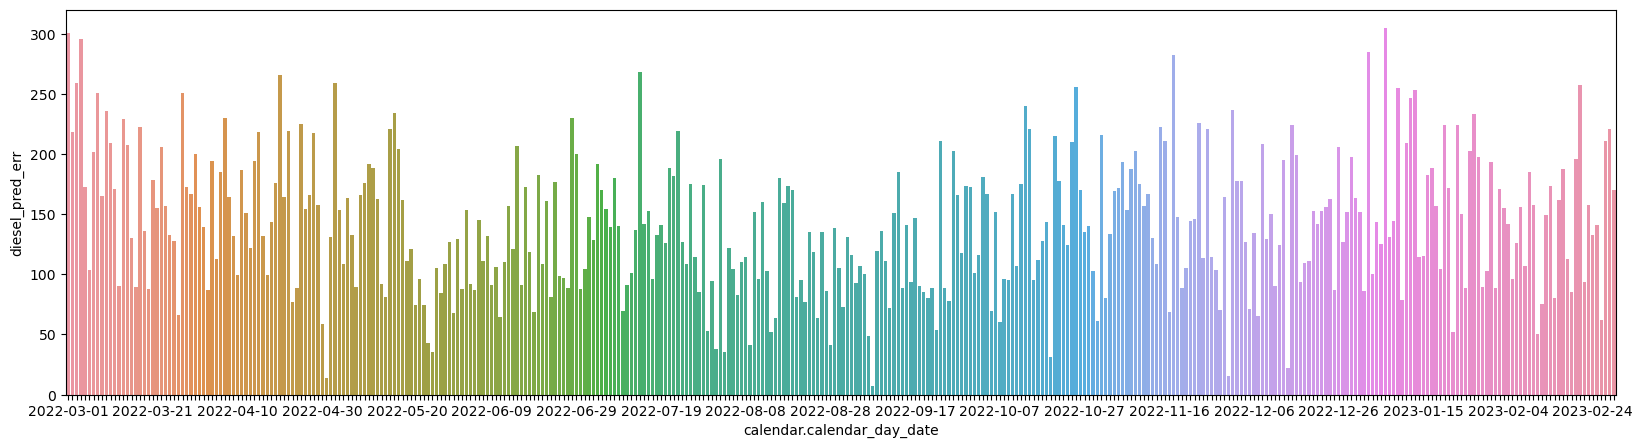

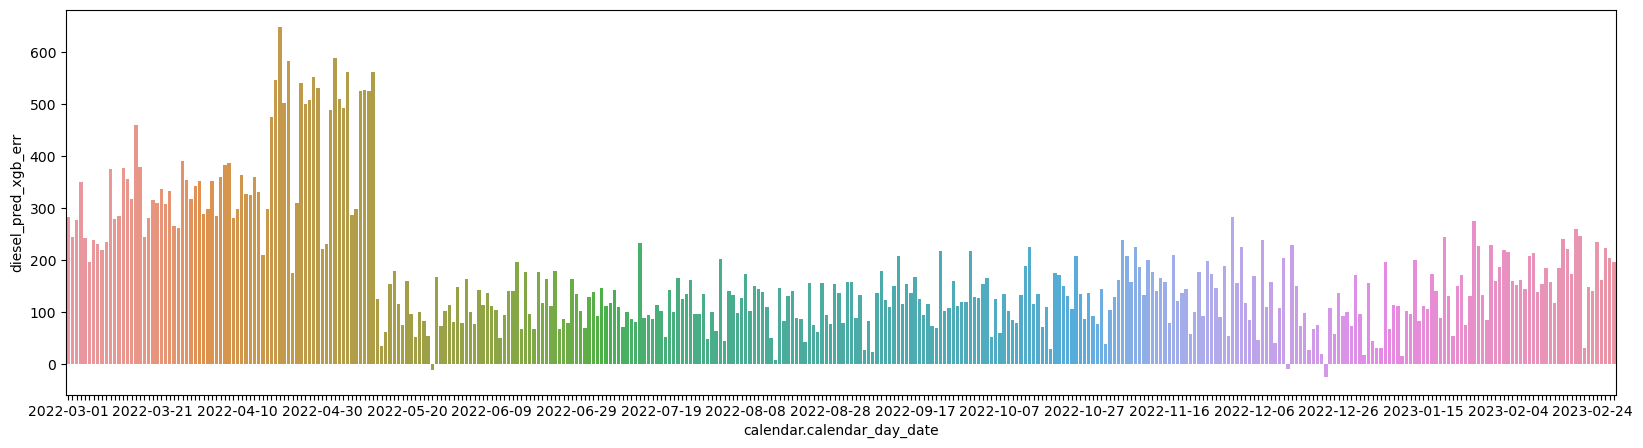

In [56]:
plt.subplots(figsize=(20, 5))
dRF = sns.barplot(data=test22680_df, 
             x= 'calendar.calendar_day_date', 
             y= test22680_df['diesel_pred_err'])
for ind, label in enumerate(dRF.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()
plt.subplots(figsize=(20, 5))
dXG = sns.barplot(data=test22680_df, 
             x= 'calendar.calendar_day_date', 
             y= test22680_df['diesel_pred_xgb_err'])
for ind, label in enumerate(dXG.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

Diesel Sales seem to be consistently underestimated throughout the year. However, XGBoost has improved levels of prediction through all but spring months.

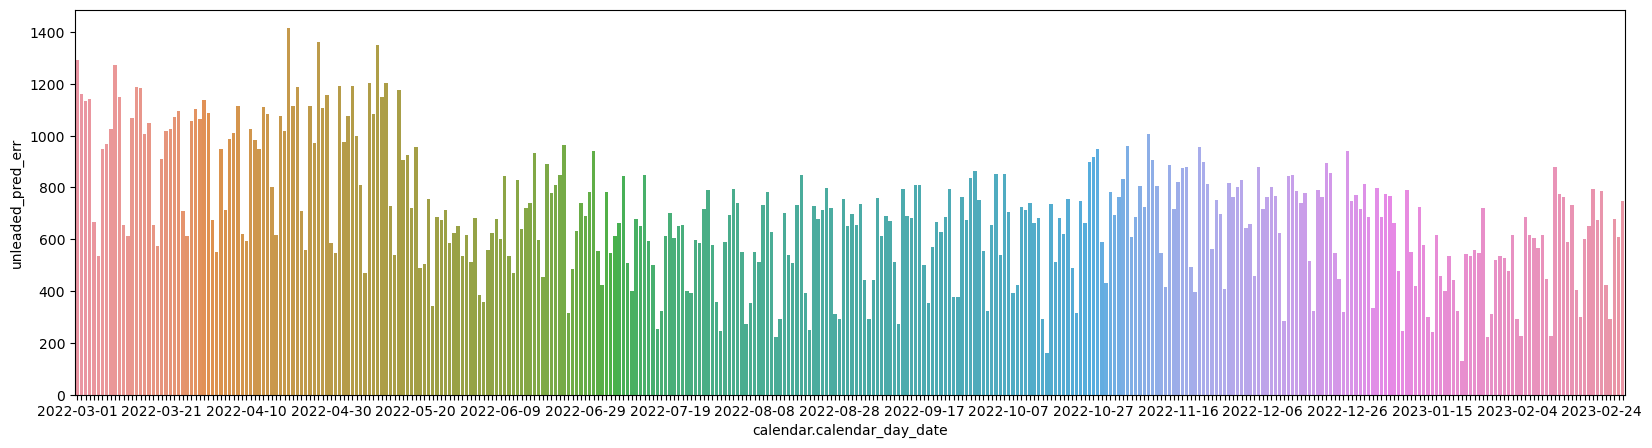

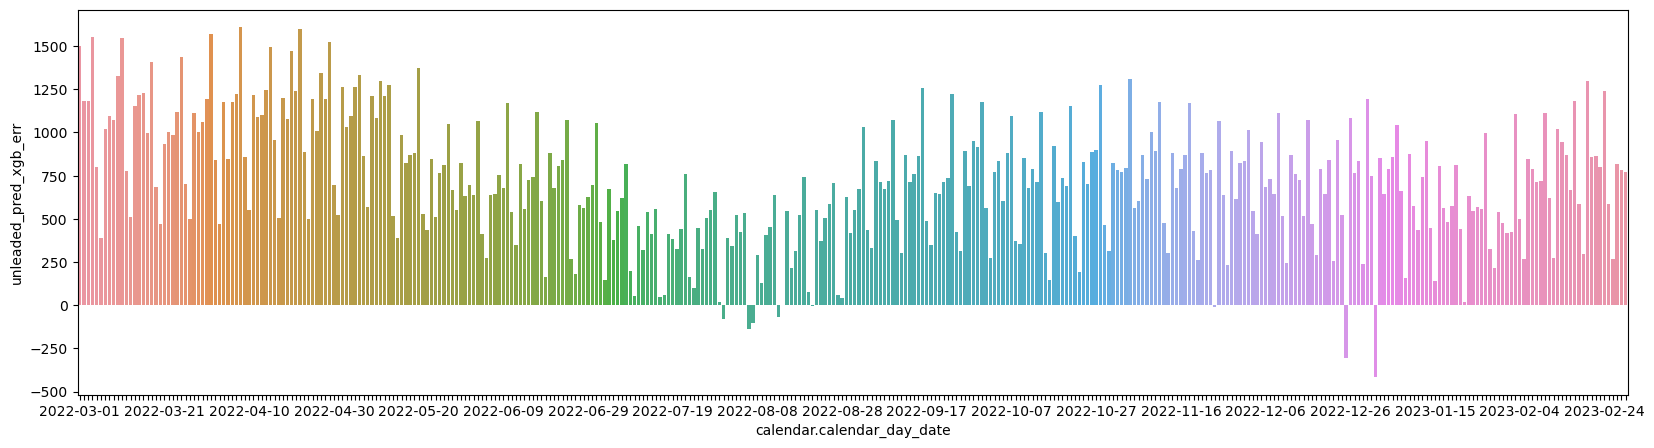

In [57]:
plt.subplots(figsize=(20, 5))
uRF = sns.barplot(data=test22680_df, 
             x= 'calendar.calendar_day_date', 
             y= test22680_df['unleaded_pred_err'])
for ind, label in enumerate(uRF.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()
plt.subplots(figsize=(20, 5))
uXG = sns.barplot(data=test22680_df, 
             x= 'calendar.calendar_day_date', 
             y= test22680_df['unleaded_pred_xgb_err'])
for ind, label in enumerate(uXG.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

Unleaded Sales are not capturing seasonality well.

## Group Member Contributions

Sampoornaa Ghosh: Time Series  
Samruddhi Supekar: Time Series  
Chris Porter: Tree Models